## Alguns gráficos e customizações que vou explorar:
- Histograma
- Gráfico de barras com x categórico e y a contagem
- Mudar a cor
- Mudar os nomes do eixo x, eixo y e título
- Mudar o tamanho do gráfico, dos eixos e da legenda
- Gráfico de barras com eixo x e y
- Gráfico de linhas
- Heatmap

In [1]:
import pandas as pd
from plotnine import *
import numpy as np

In [2]:
fifa = pd.read_csv("fifa_sample_wsR.csv")

In [3]:
fifa.head()

,Unnamed: 0,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club,wage_eur,player_positions,preferred_foot
0,1813,224599,Yan Junling,颜骏凌,28,191,83,China PR,Shanghai SIPG FC,13000,GK,Right
1,12287,243530,Mujaid,Mujaid Sadick Aliu,19,180,75,Spain,Deportivo de La Coruña,1000,"CB, RB",Right
2,4257,202676,A. Taggart,Adam Taggart,26,183,70,Australia,Suwon Samsung Bluewings,6000,"ST, CF",Right
3,8794,241187,L. Geertruida,Lutsharel Geertruida,18,180,75,Netherlands,Feyenoord,1000,"CB, CDM, RB",Right
4,3851,193254,C. Trimmel,Christopher Trimmel,32,189,82,Austria,1. FC Union Berlin,24000,RB,Right


In [4]:
fifa["wage_eur_bin"] = fifa["wage_eur"] <= 4000

## Gráficos de uma variável

## Histogramas

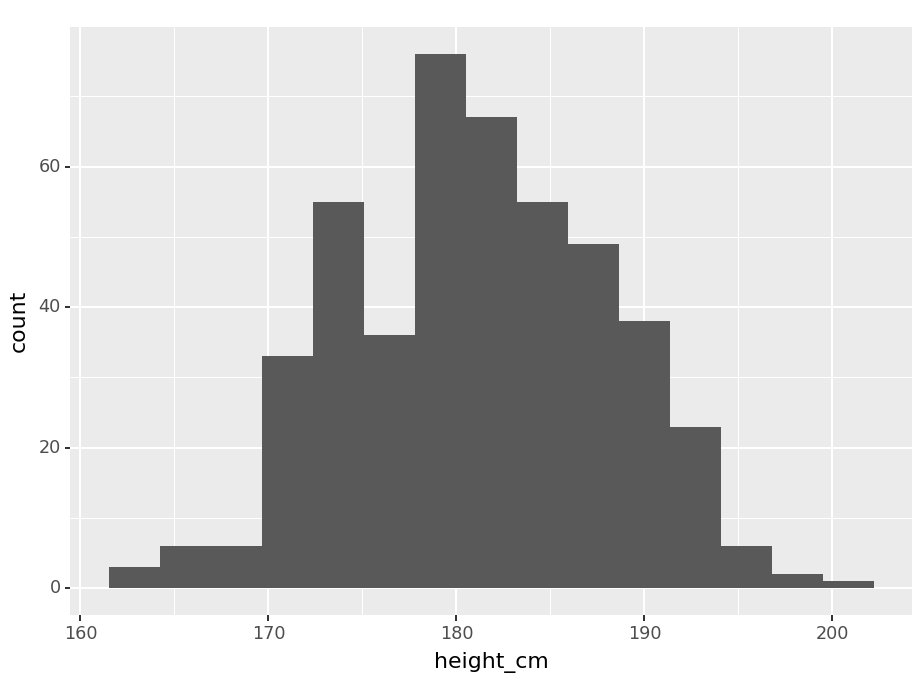

<Figure Size: (460 x 345)>

In [5]:
ggplot(fifa)+aes("height_cm")+geom_histogram(bins=15)

## Ajustando detalhes do histograma

## A componente que muda a cor dos histogramas se chama "fill" e o contorno de "color".

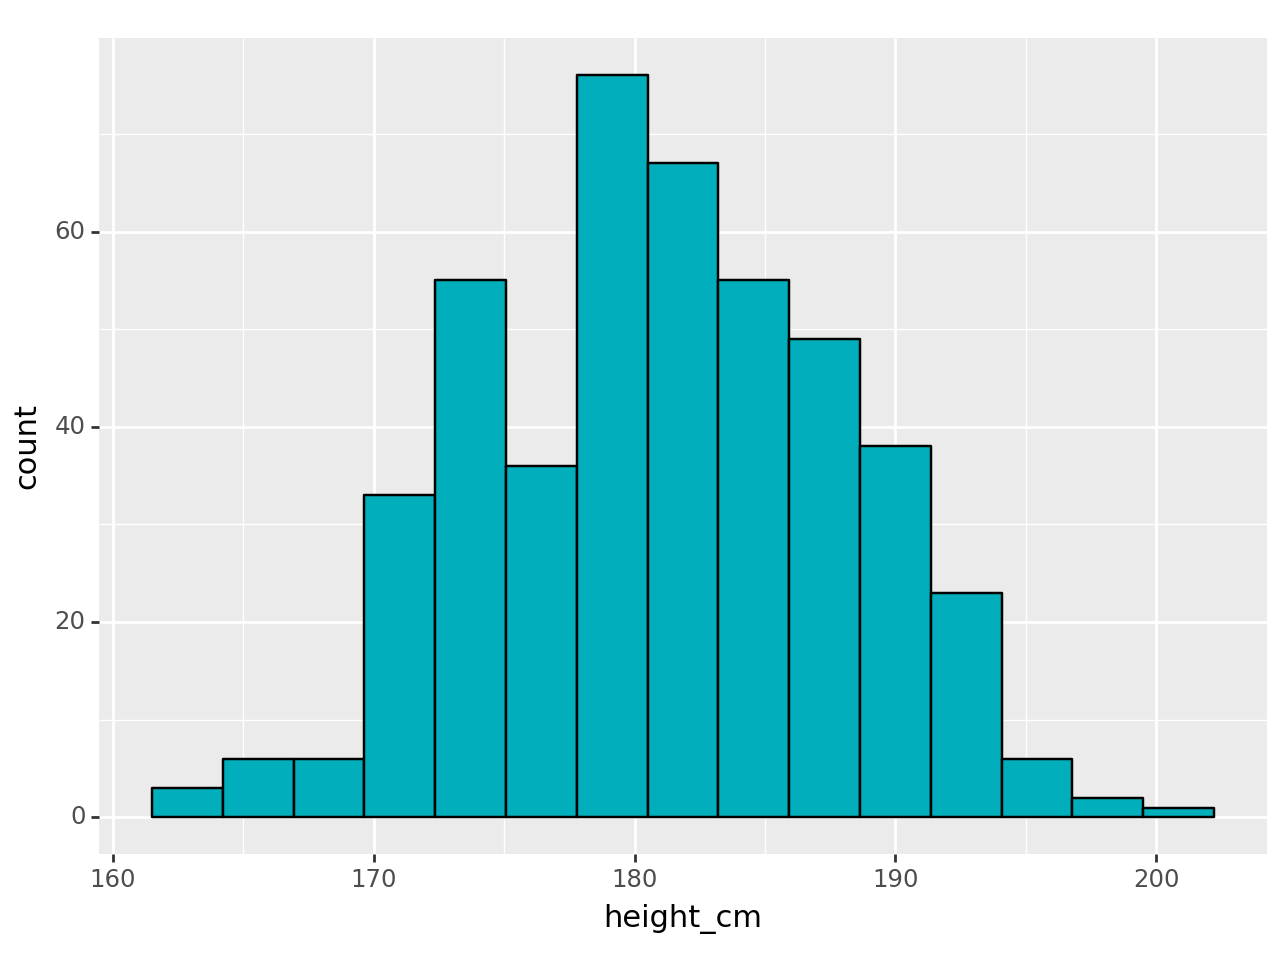

<Figure Size: (640 x 480)>

In [6]:
ggplot(fifa)+aes("height_cm")+geom_histogram(bins=15, fill="#00AFBB",color="black")

## O fundo de qualquer gráfico pode ser alterado através do "theme"
#### [Themes](https://ggplot2.tidyverse.org/reference/ggtheme.html)
- theme_classic()
- theme_light()
- theme_bw()
- theme_test()

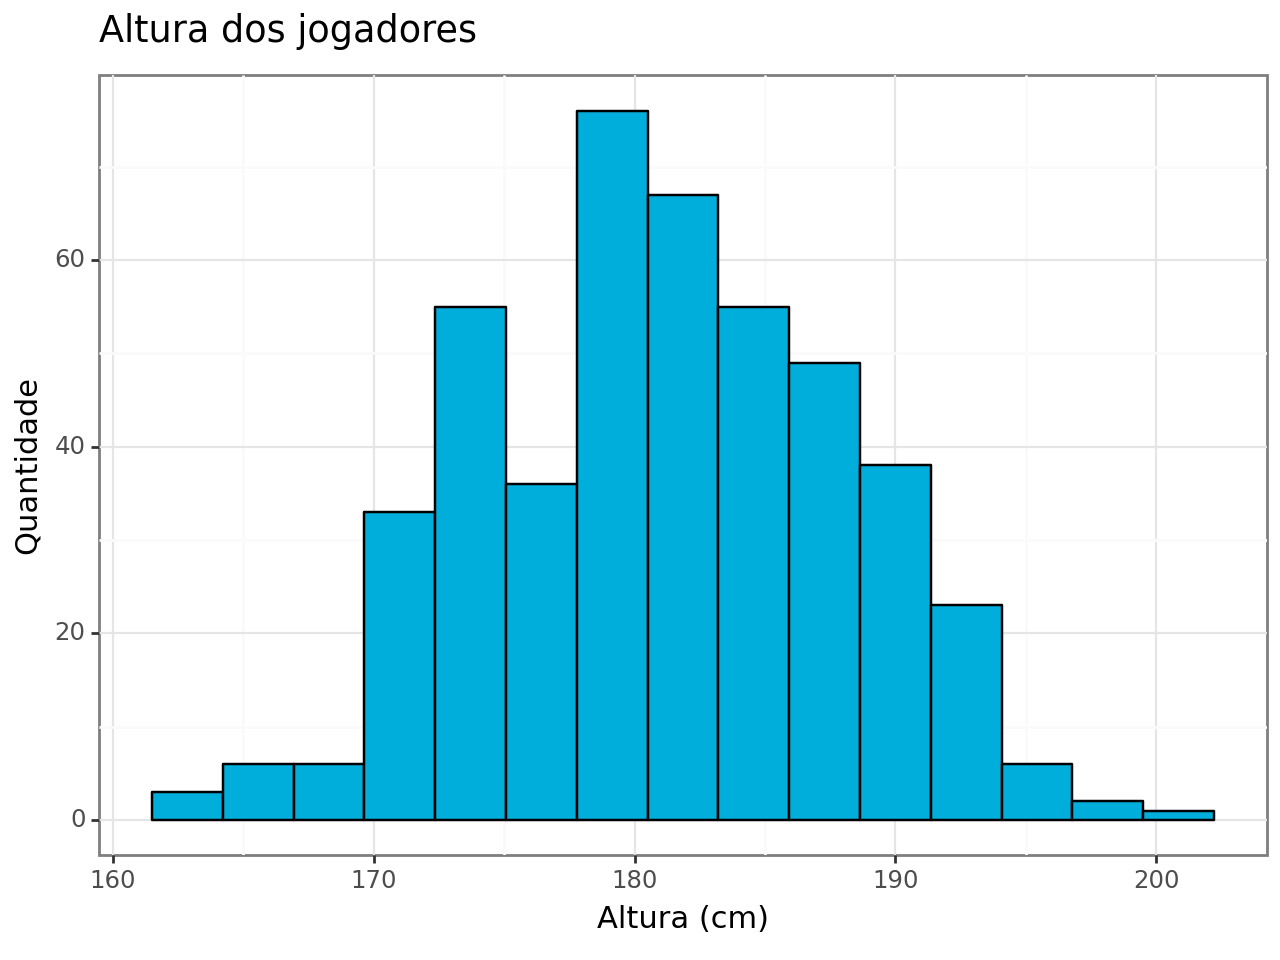

<Figure Size: (640 x 480)>

In [7]:
(ggplot(fifa)+aes("height_cm")+geom_histogram(bins=15, fill="#00aedb",color="black")
+theme_bw()+labs(y = "Quantidade", x = "Altura (cm)", title = "Altura dos jogadores"))

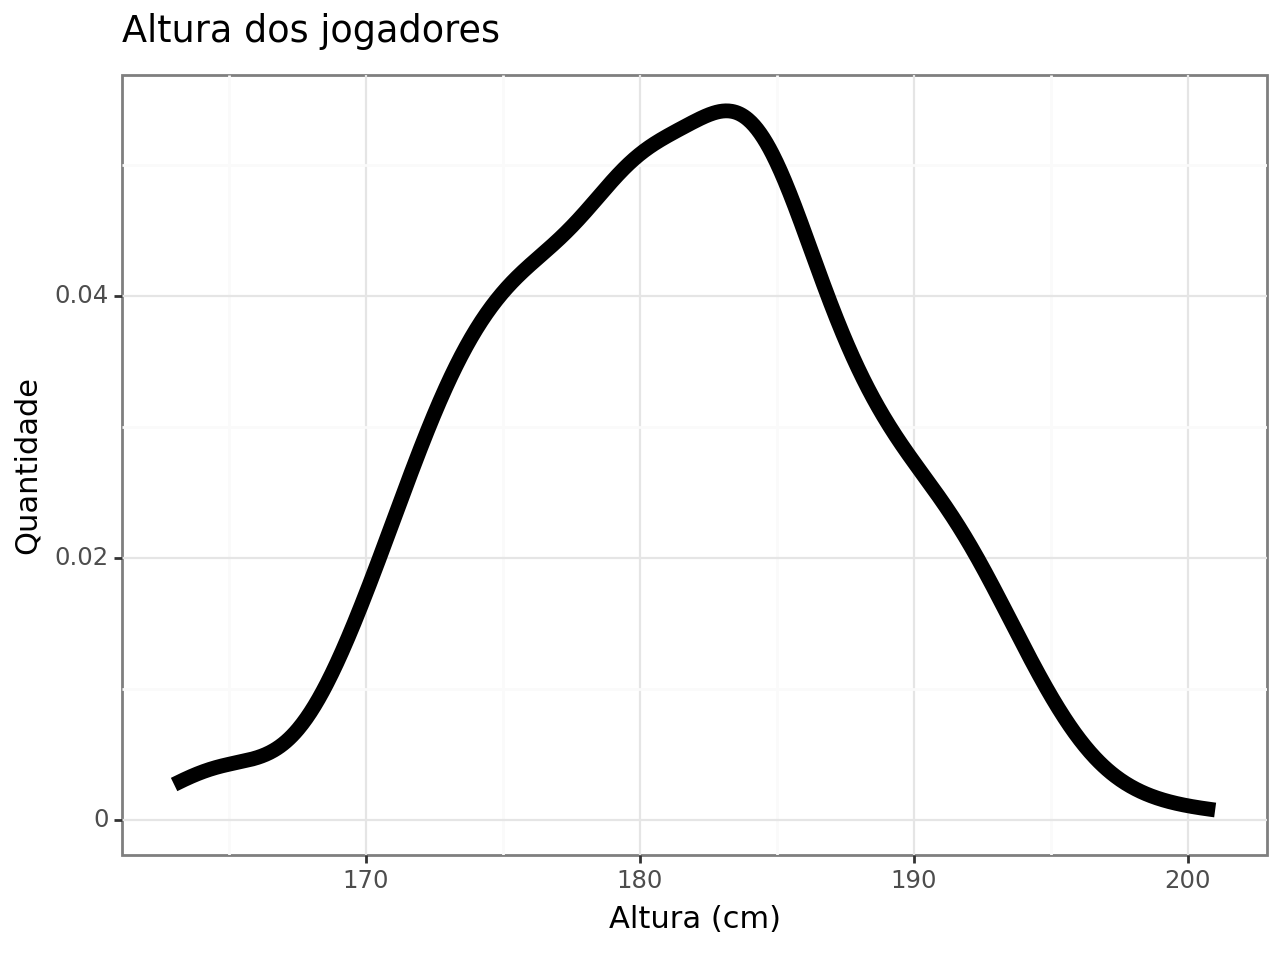

<Figure Size: (640 x 480)>

In [8]:
(ggplot(fifa)+aes("height_cm") + geom_density(size=3)+theme_bw()
+labs(y = "Quantidade", x = "Altura (cm)", title = "Altura dos jogadores"))

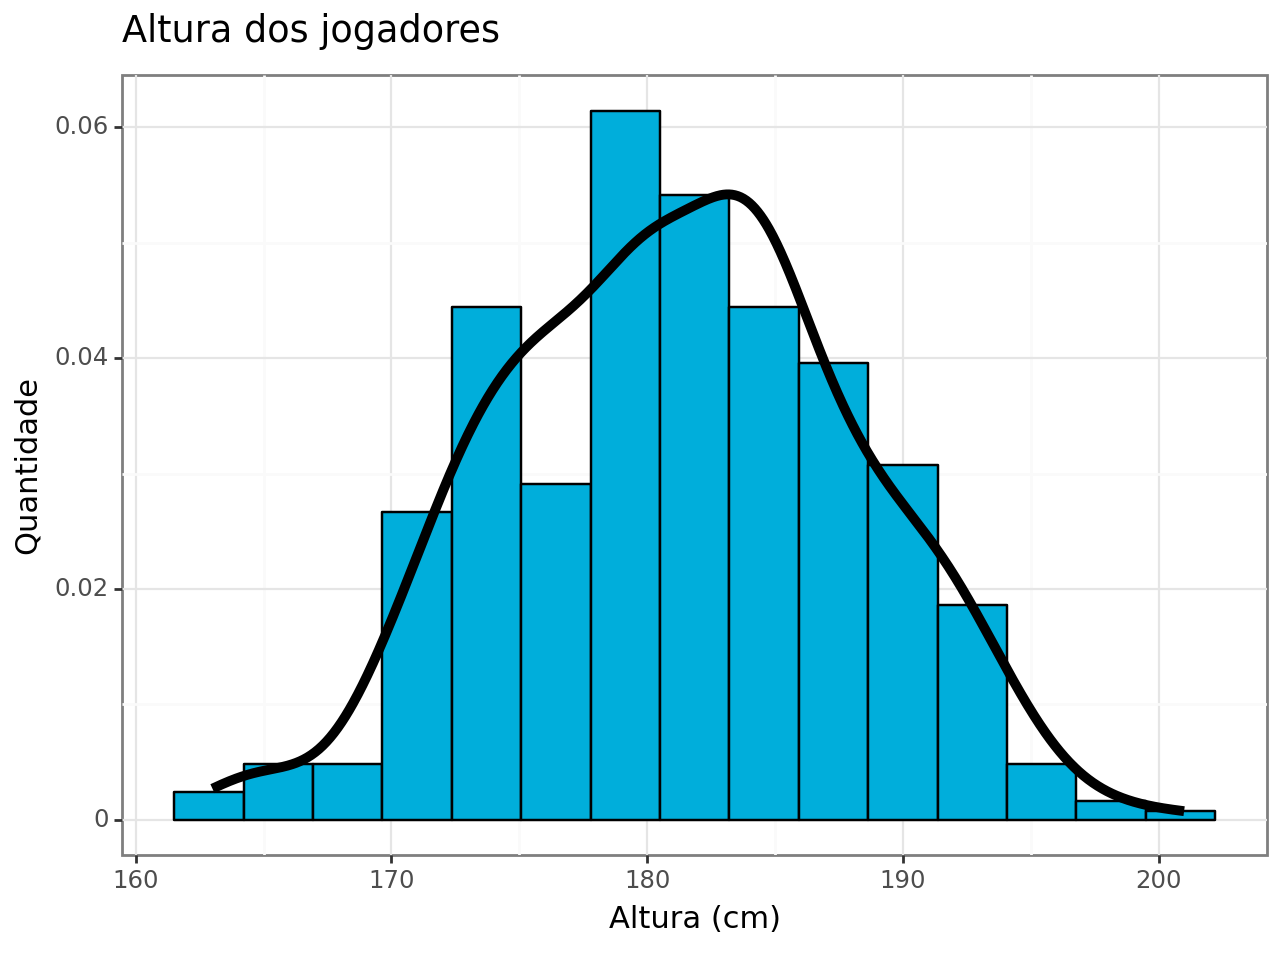

<Figure Size: (640 x 480)>

In [9]:
(ggplot(fifa)+aes("height_cm")+geom_histogram(aes(y = "..density.."), bins=15, fill="#00aedb",color="black")
 + geom_density(size=2)
+theme_bw()+labs(y = "Quantidade", x = "Altura (cm)", title = "Altura dos jogadores"))

## Box plot

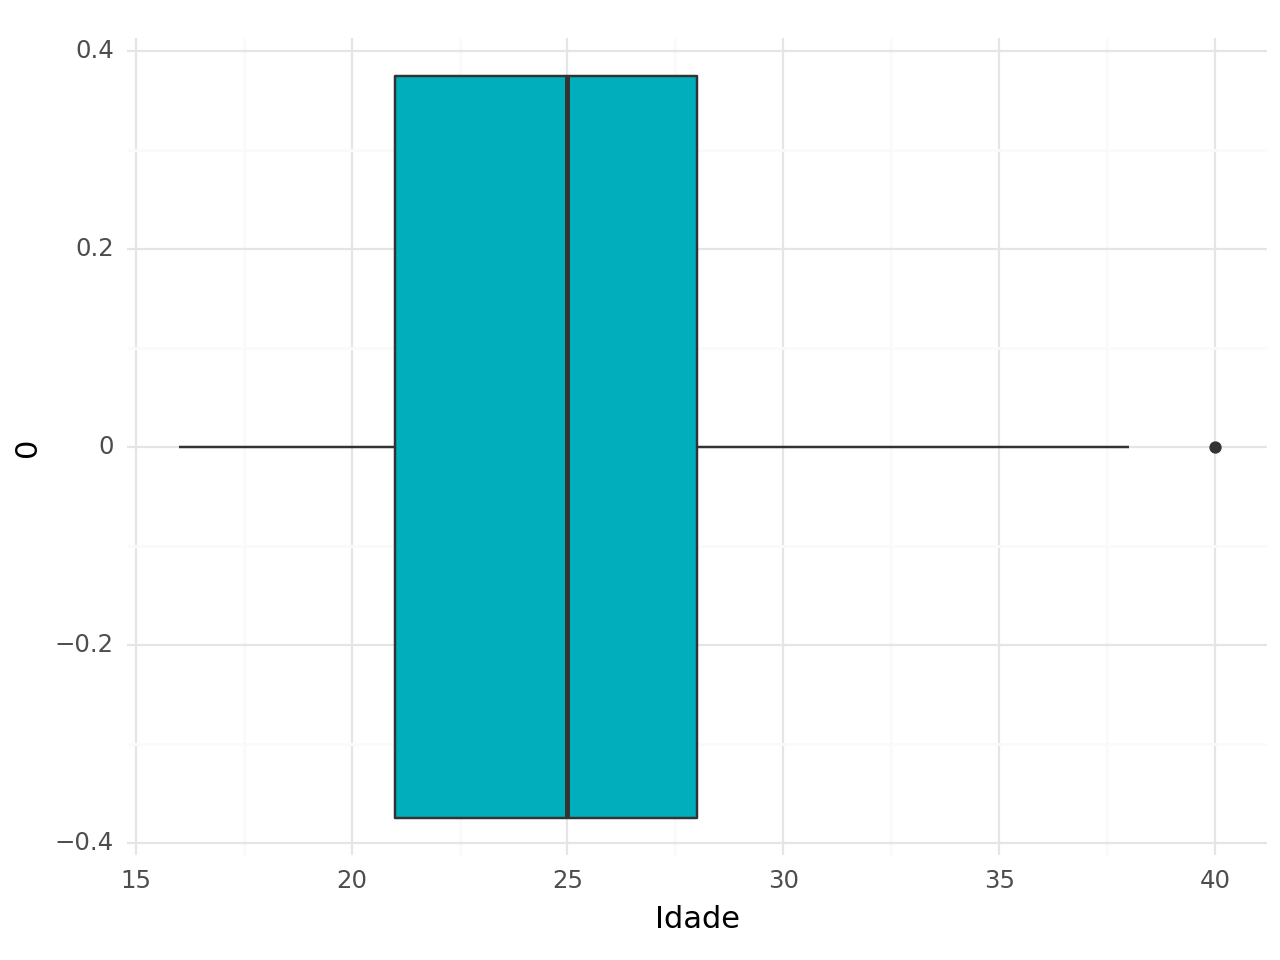

<Figure Size: (640 x 480)>

In [10]:
(ggplot(data = fifa) + aes(x=0, y="age") +
 geom_boxplot(fill="#00AFBB")+
 theme_minimal() + coord_flip() +
 labs(y="Idade")
)

## Trabalhando com variáveis categóricas

## Gráfico de barras

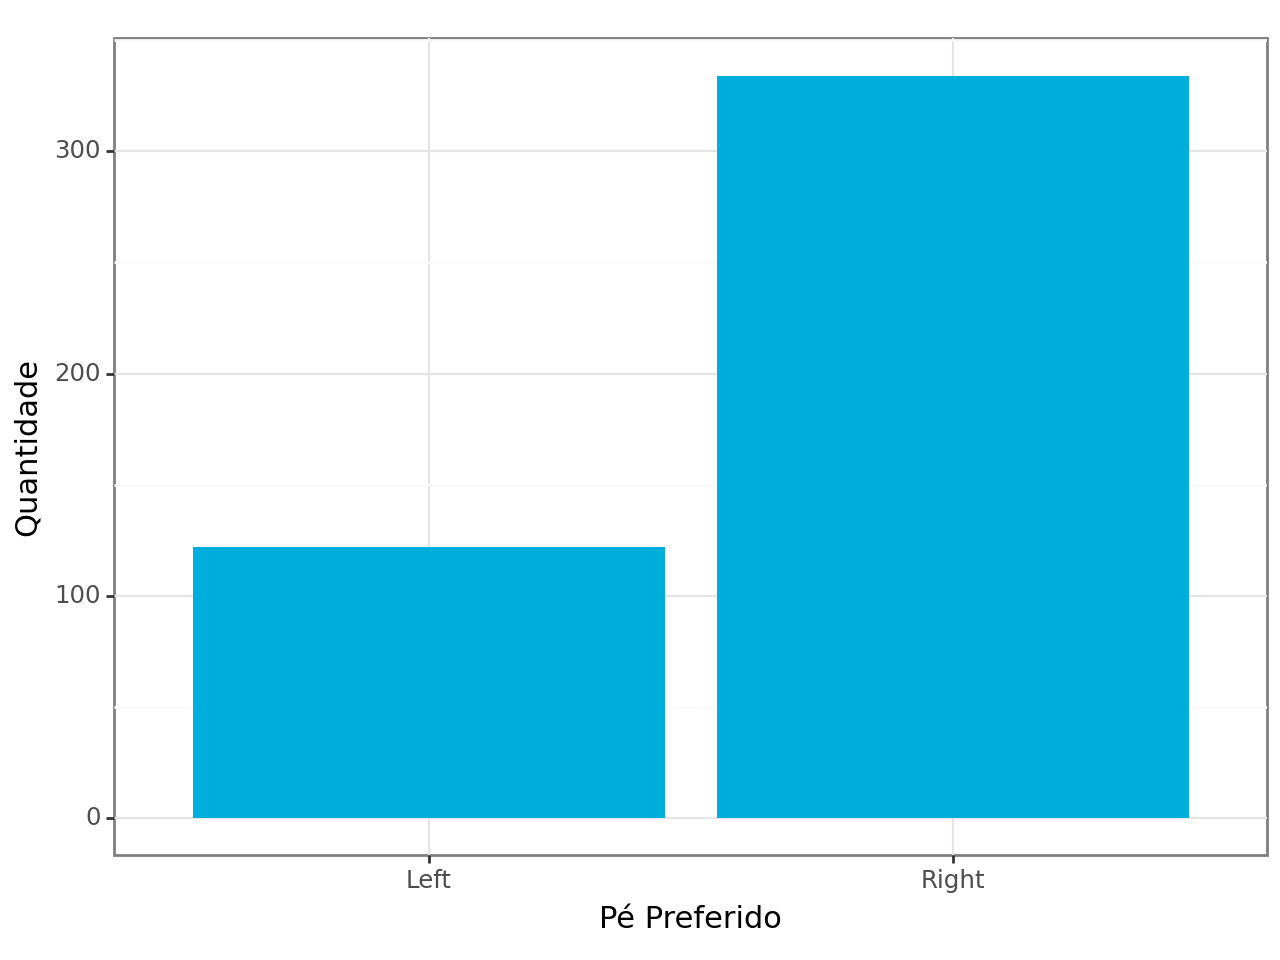

<Figure Size: (640 x 480)>

In [11]:
(ggplot(fifa)+aes("preferred_foot")+geom_bar(fill="#00aedb")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido"))

## Ordenando usando o scale_x_discrete. Dá pra ordenar as barras do maior para o menor ou vice-versa usando essa função!

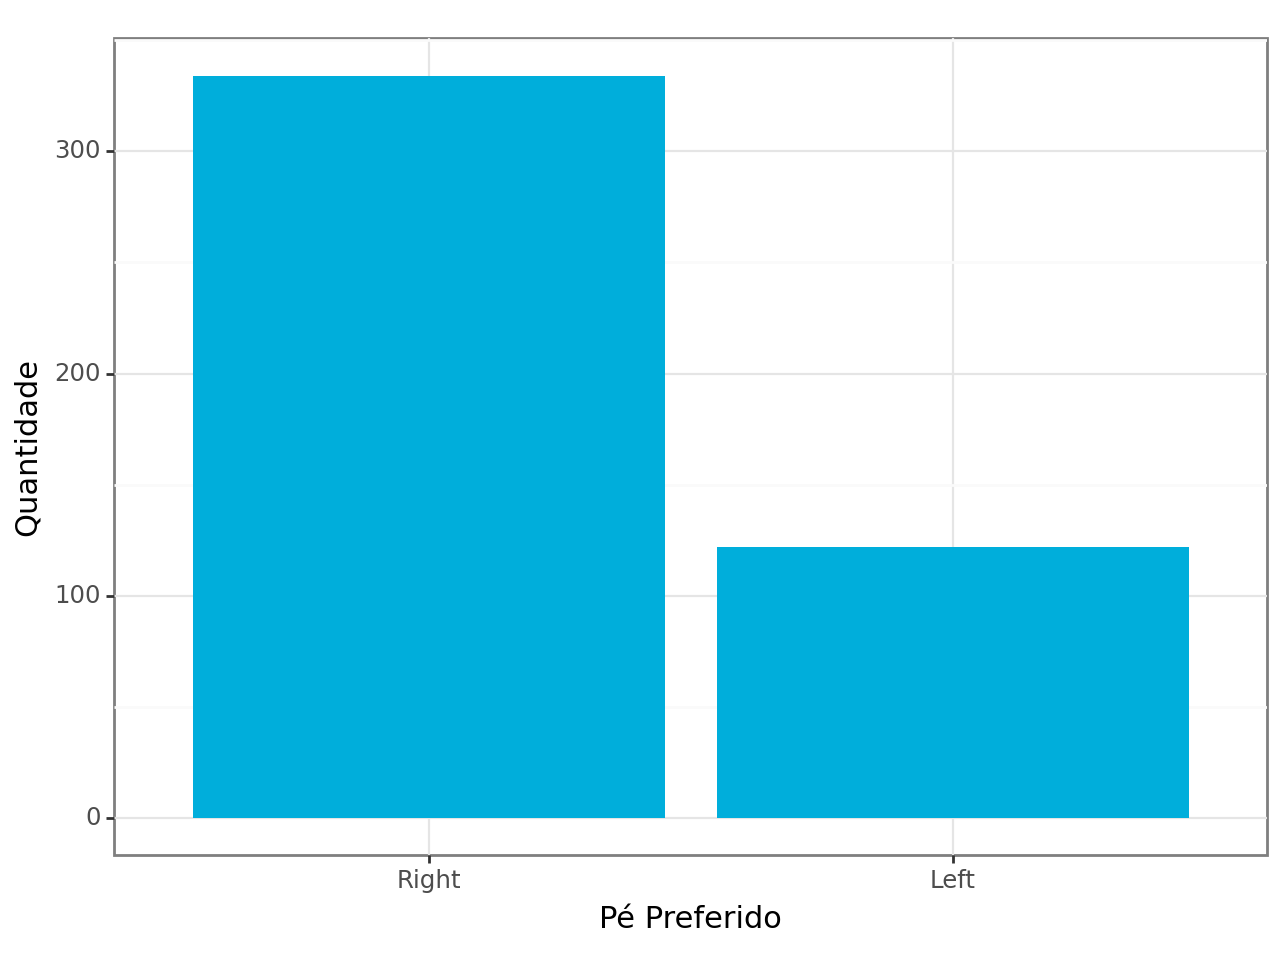

<Figure Size: (640 x 480)>

In [12]:
(ggplot(fifa)+aes("preferred_foot")+geom_bar(fill="#00aedb")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido")
+ scale_x_discrete(limits=["Right", "Left"]))

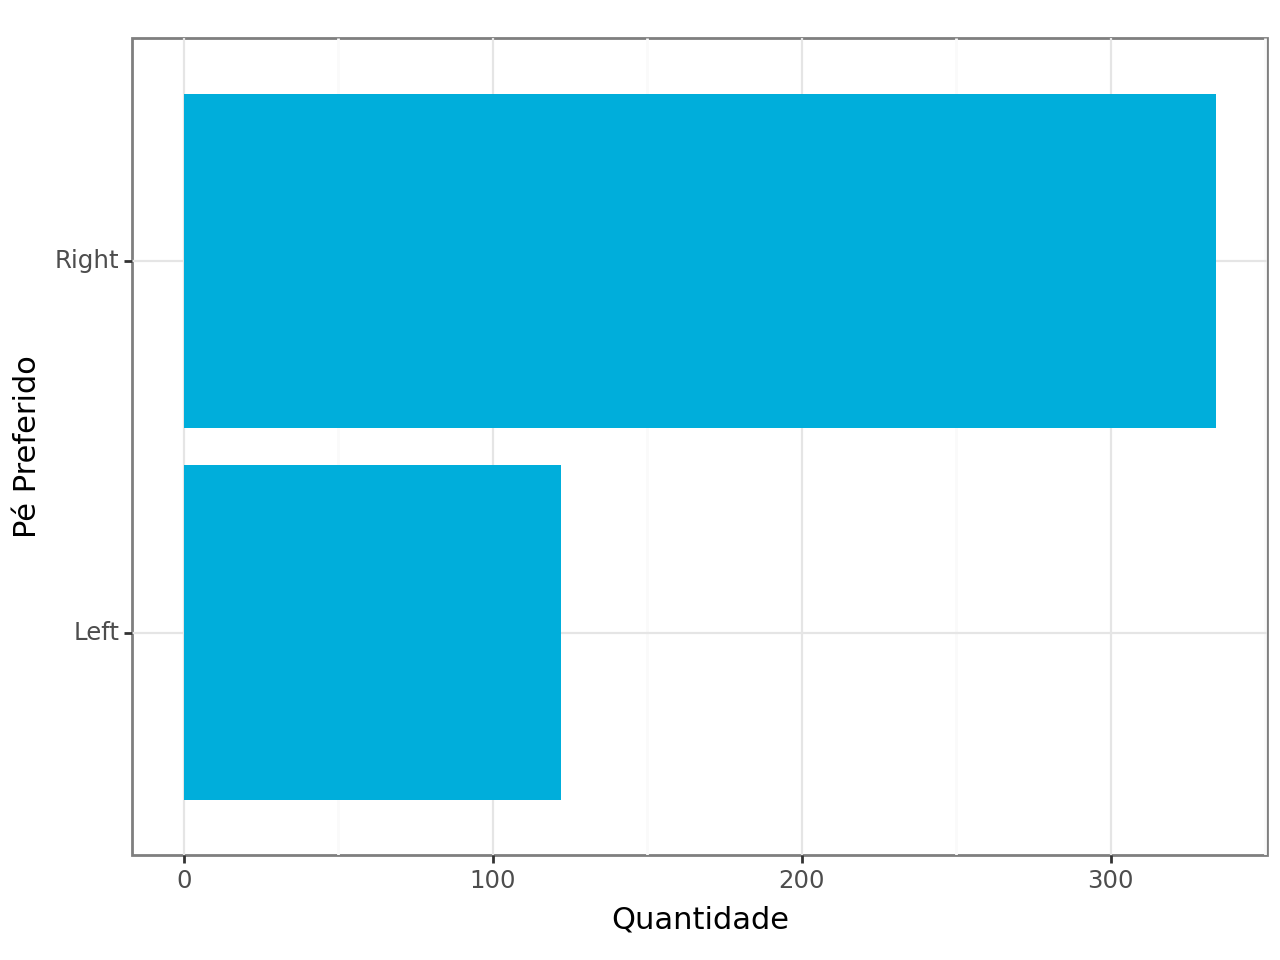

<Figure Size: (640 x 480)>

In [13]:
(ggplot(fifa)+aes("preferred_foot")+geom_bar(fill="#00aedb")+theme_bw()+ coord_flip() +
labs(y = "Quantidade", x = "Pé Preferido"))

### Gráfico de dispersão

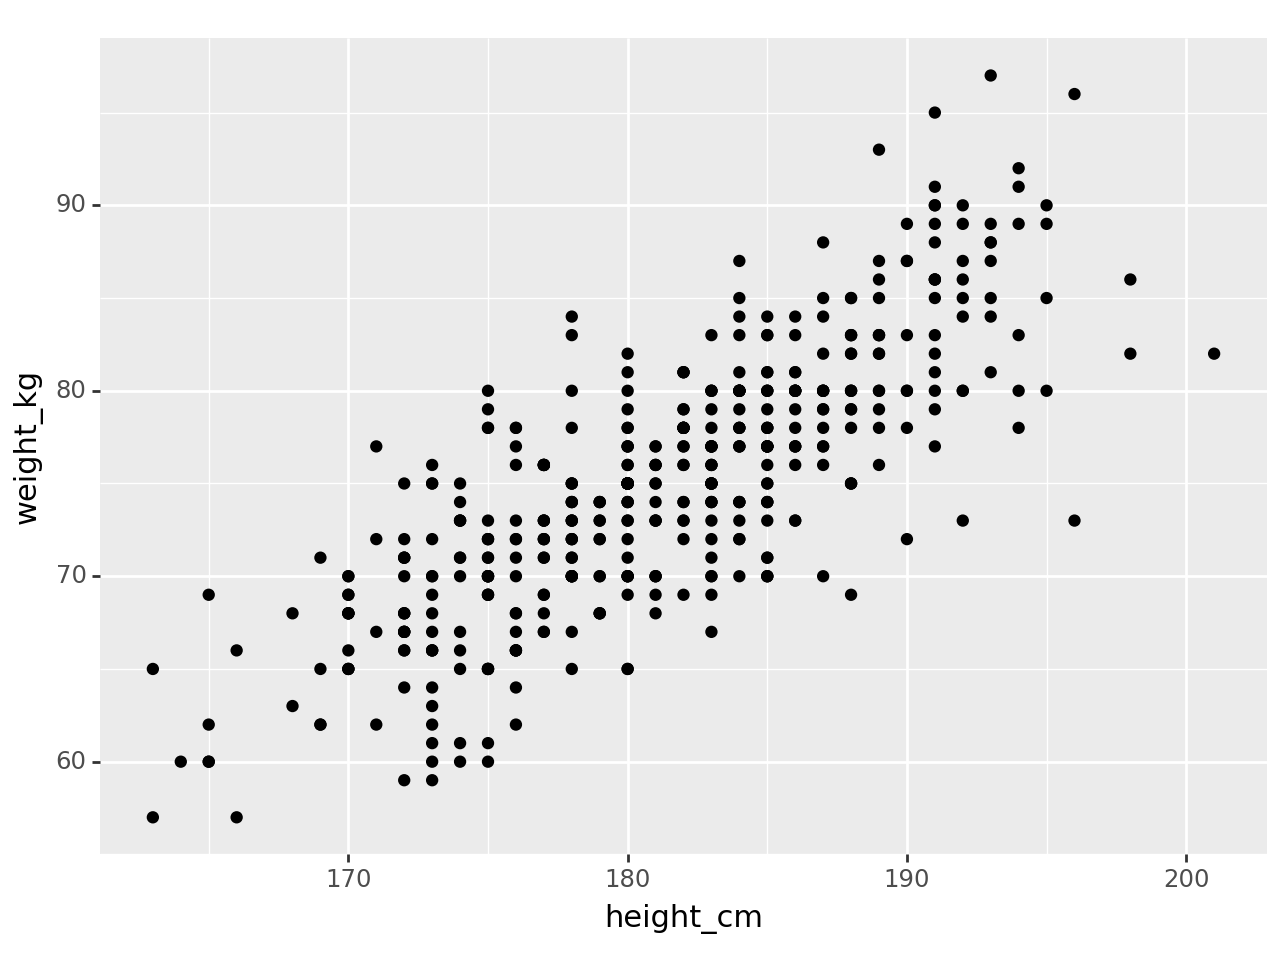

<Figure Size: (640 x 480)>

In [14]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point())

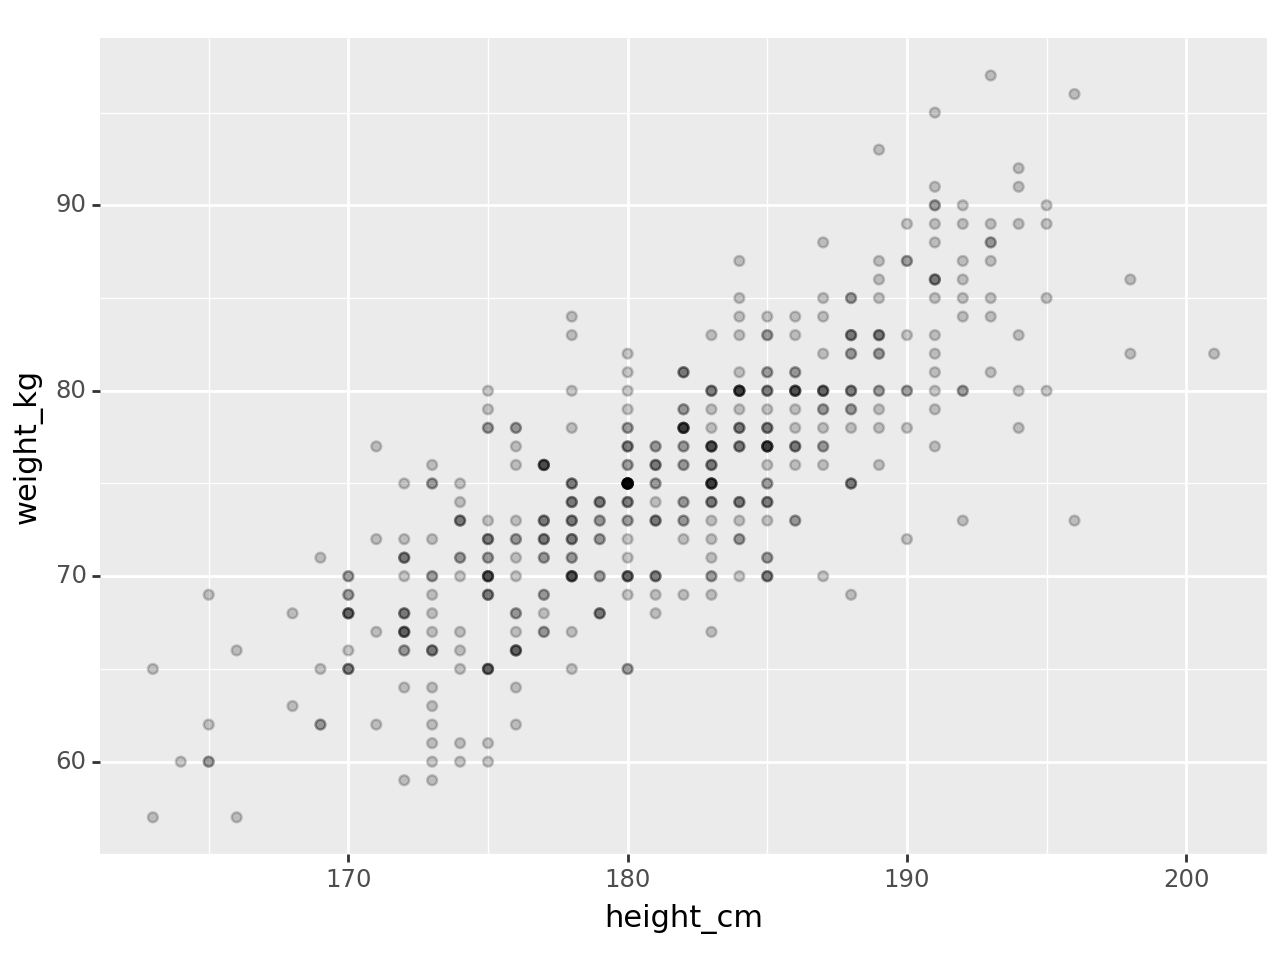

<Figure Size: (640 x 480)>

In [15]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point(alpha=0.2))

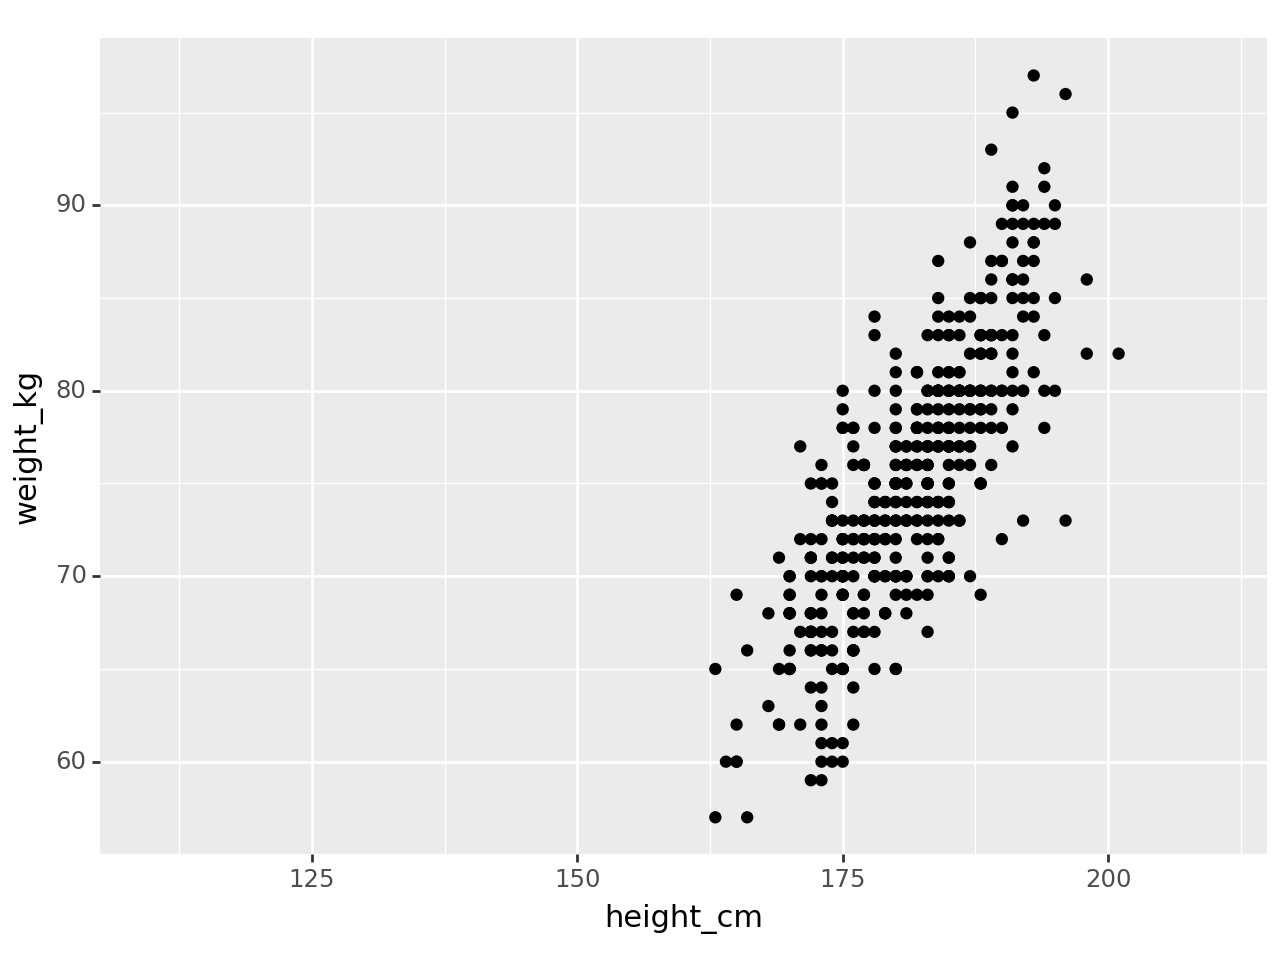

<Figure Size: (640 x 480)>

In [16]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point()+scale_x_continuous(name="height_cm", limits=(110, 210)))

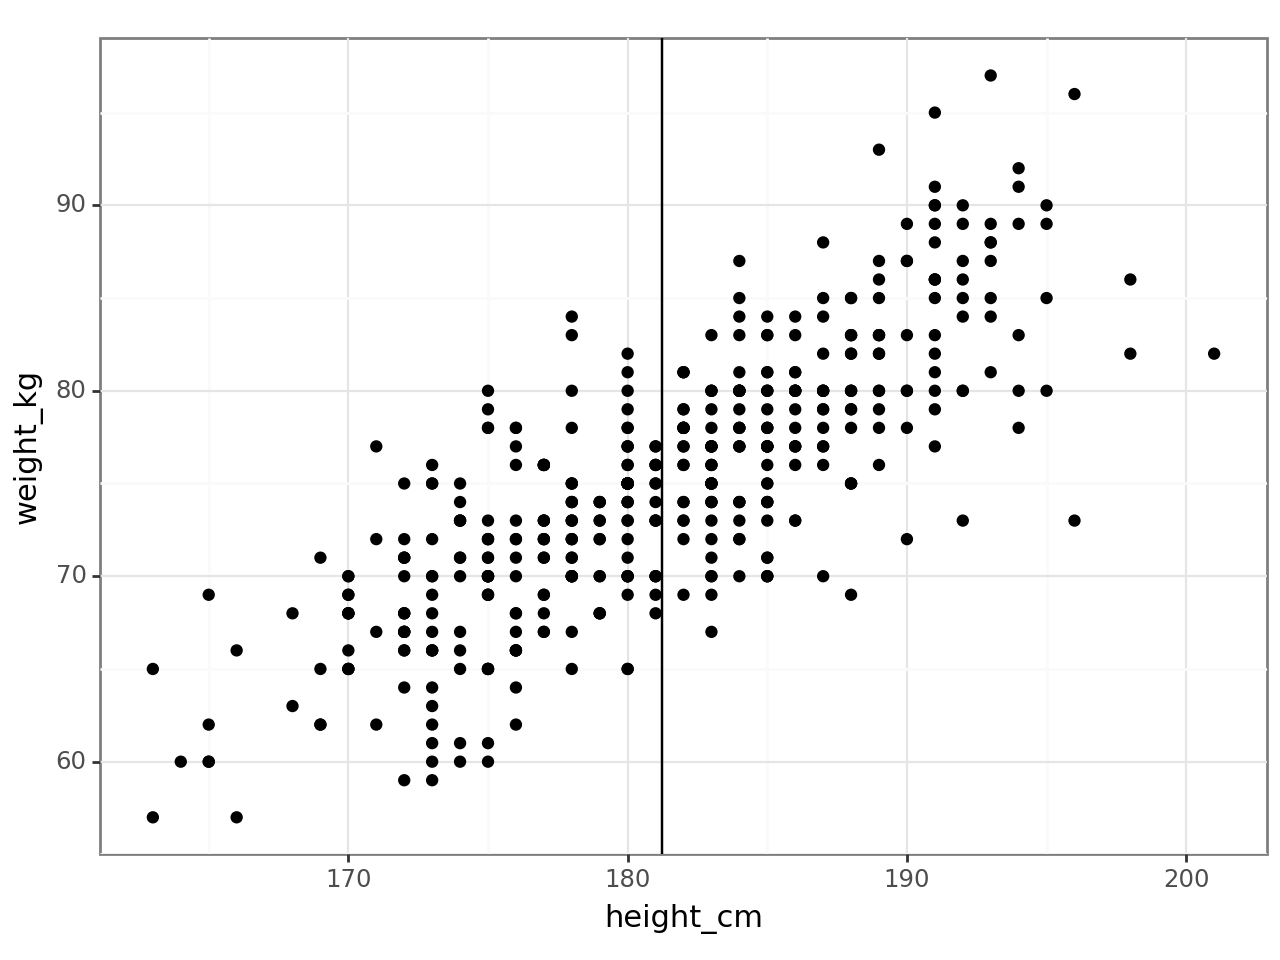

<Figure Size: (640 x 480)>

In [17]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point()+theme_bw()
+geom_vline(xintercept = fifa["height_cm"].mean()))

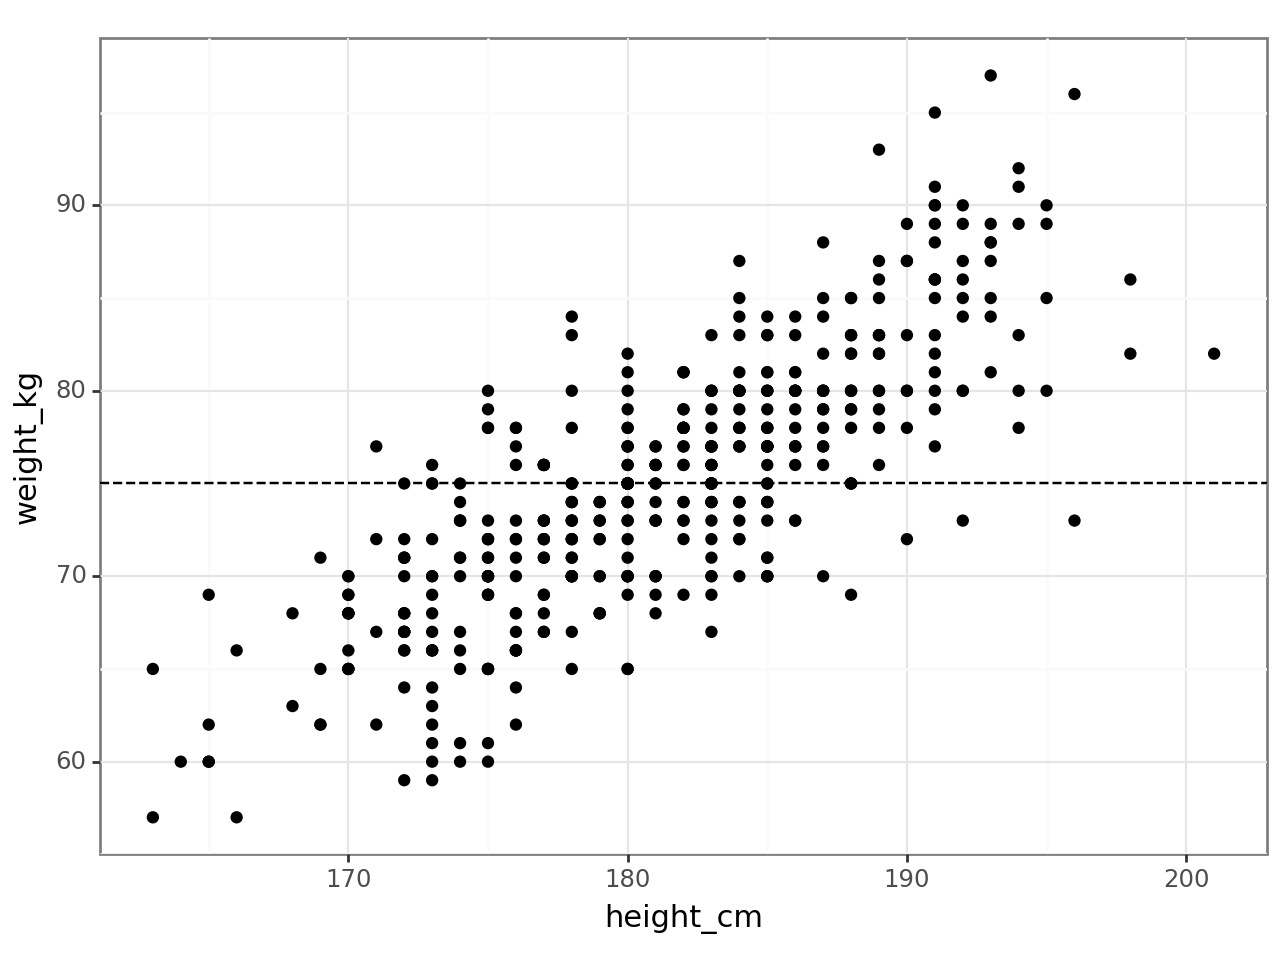

<Figure Size: (640 x 480)>

In [18]:
(ggplot(fifa) + aes(x="height_cm", y= "weight_kg") + geom_point()+theme_bw()
+geom_hline(yintercept = fifa["weight_kg"].median(), linetype = "dashed"))

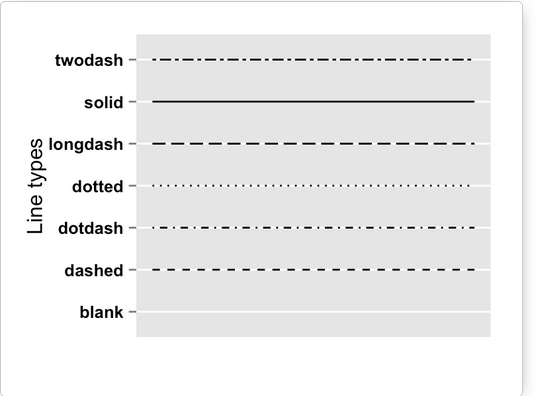

## Ajuste de uma regressão linear
 #### [Visualização e ajuste de modelos estatísticos](https://ggplot2.tidyverse.org/reference/geom_smooth.html)

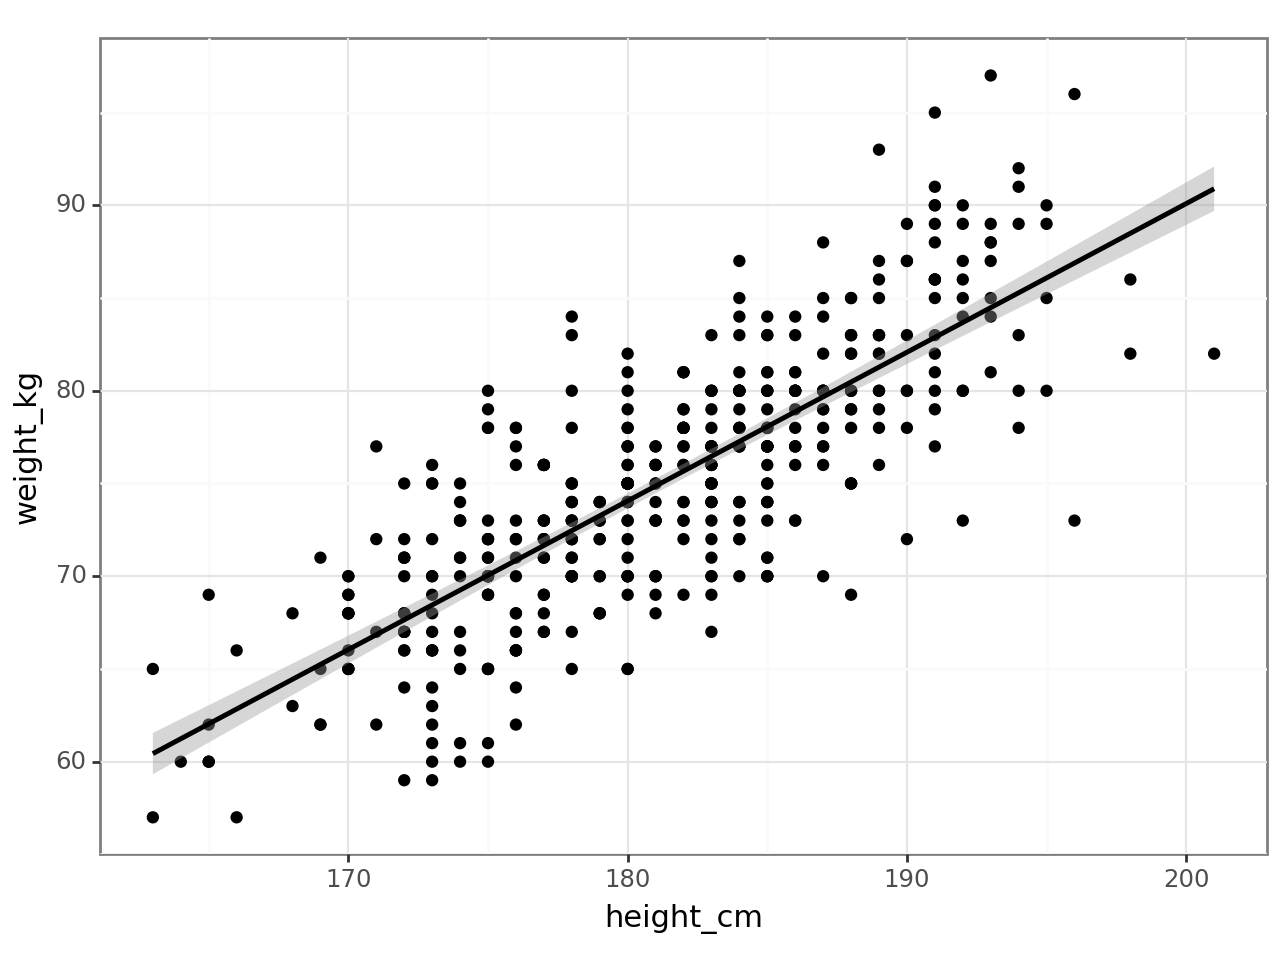

<Figure Size: (640 x 480)>

In [19]:
(ggplot(data = fifa) + aes(x = "height_cm", y = "weight_kg") + geom_point()
+theme_bw()
+ geom_smooth(method = "lm"))

## Separando os dados pela cor dos pontos

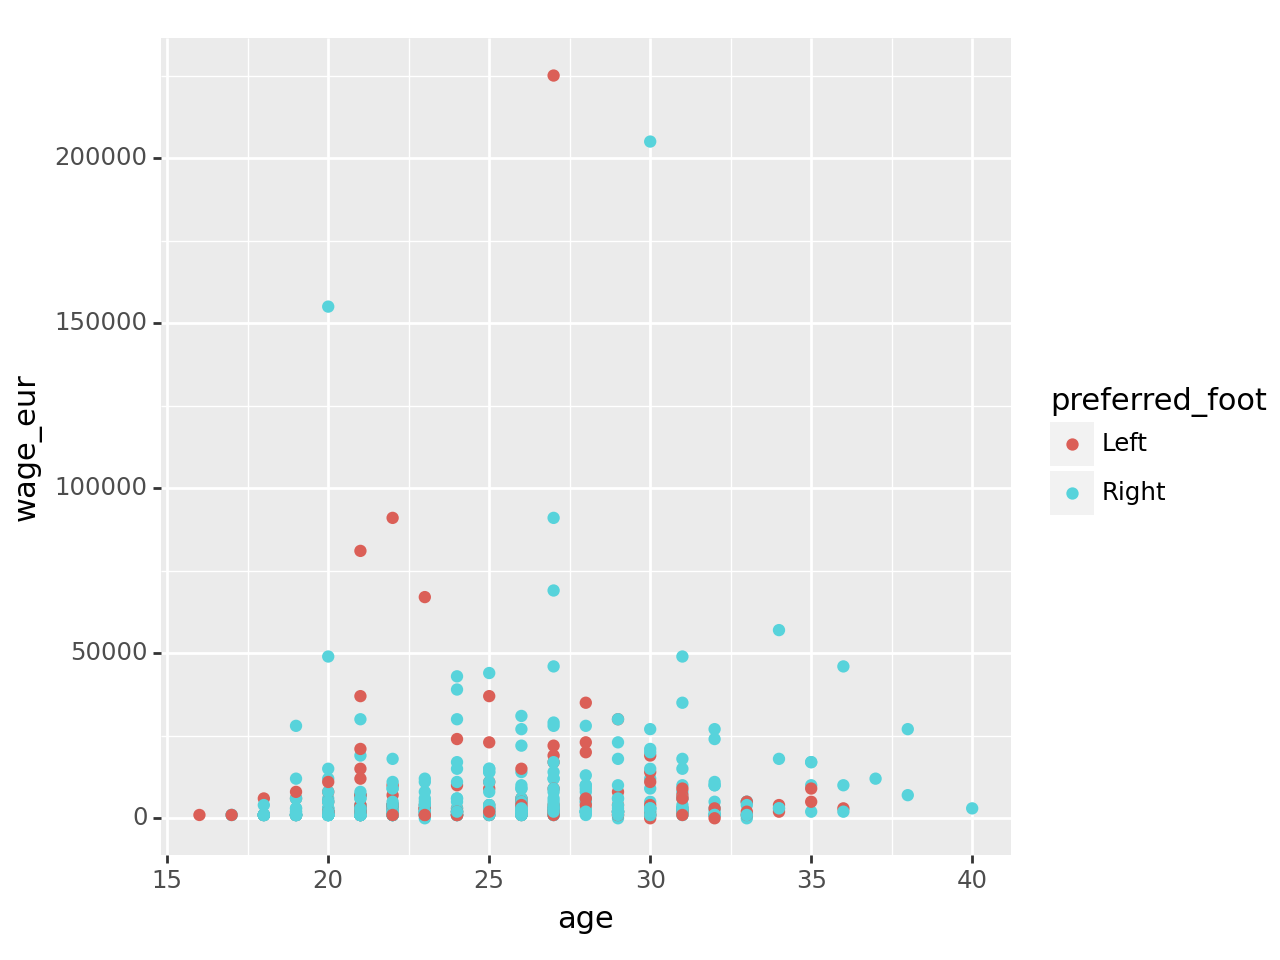

<Figure Size: (640 x 480)>

In [20]:
(ggplot(data = fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color = "preferred_foot")))

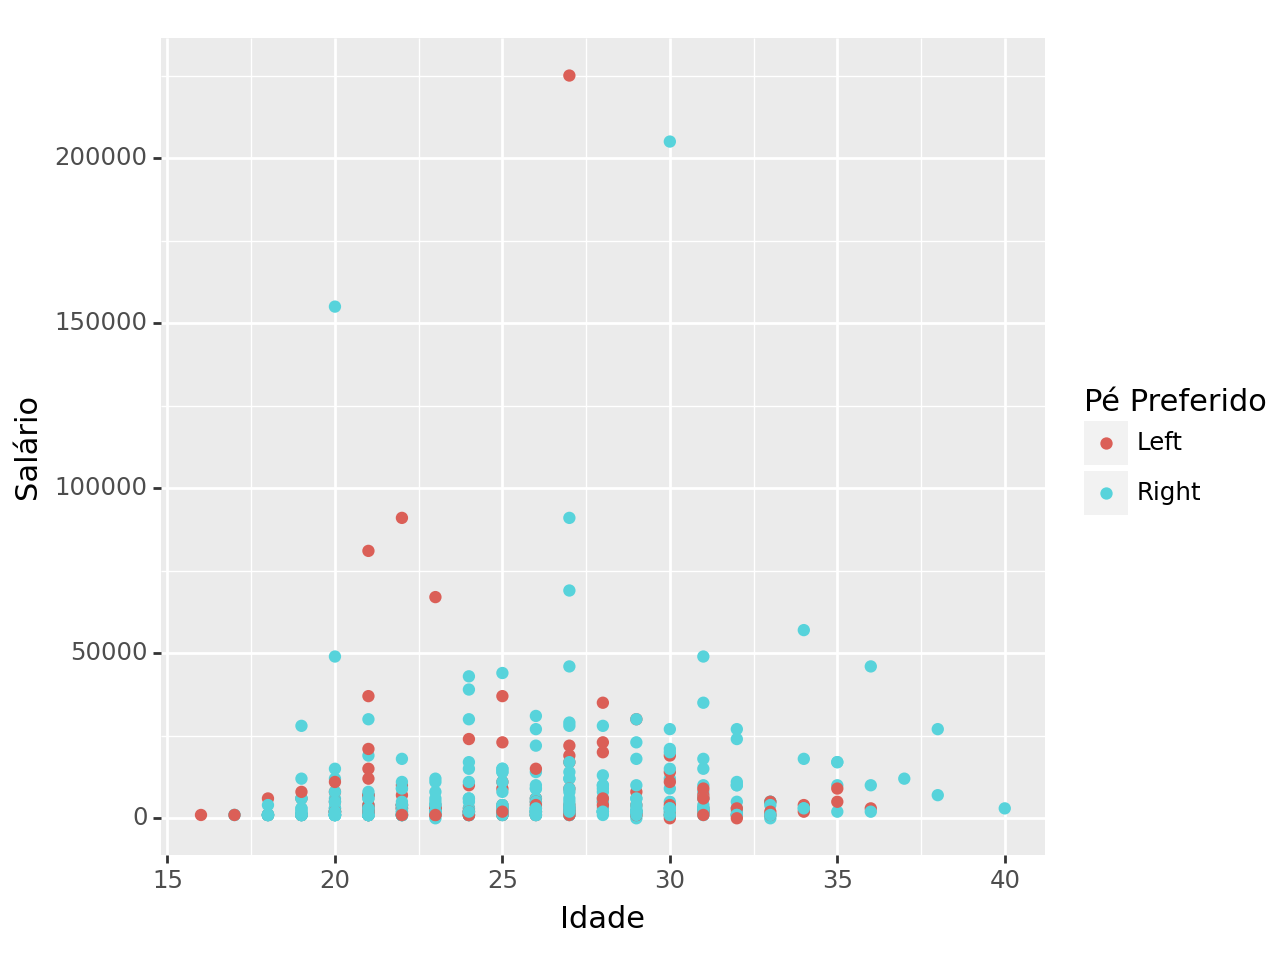

<Figure Size: (640 x 480)>

In [21]:
(ggplot(data = fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color = "preferred_foot"))+ labs(x="Idade", y="Salário", color="Pé Preferido"))

## Dá pra mudar o título da legenda mudando o color para fill para outros tipos de gráficos como o gráfico de barras onde se usa fill

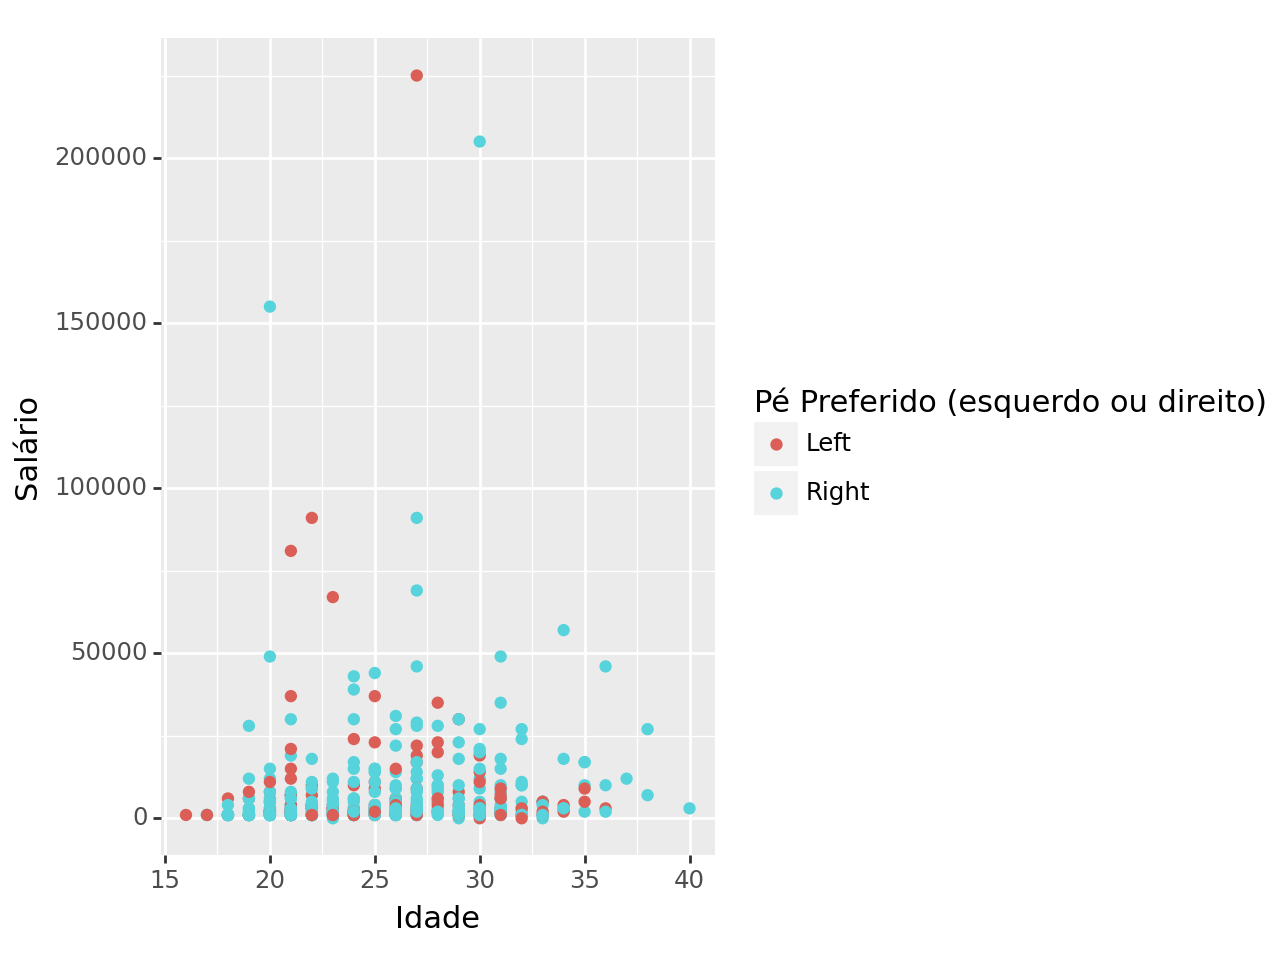

<Figure Size: (640 x 480)>

In [22]:
(ggplot(data = fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color = "preferred_foot"))+ labs(x="Idade", y="Salário", color="Pé Preferido")+
guides(color=guide_legend(title="Pé Preferido (esquerdo ou direito)")))

## Separando gráficos por alguma variável
#### [Facetas](https://ggplot2.tidyverse.org/reference/facet_grid.html)

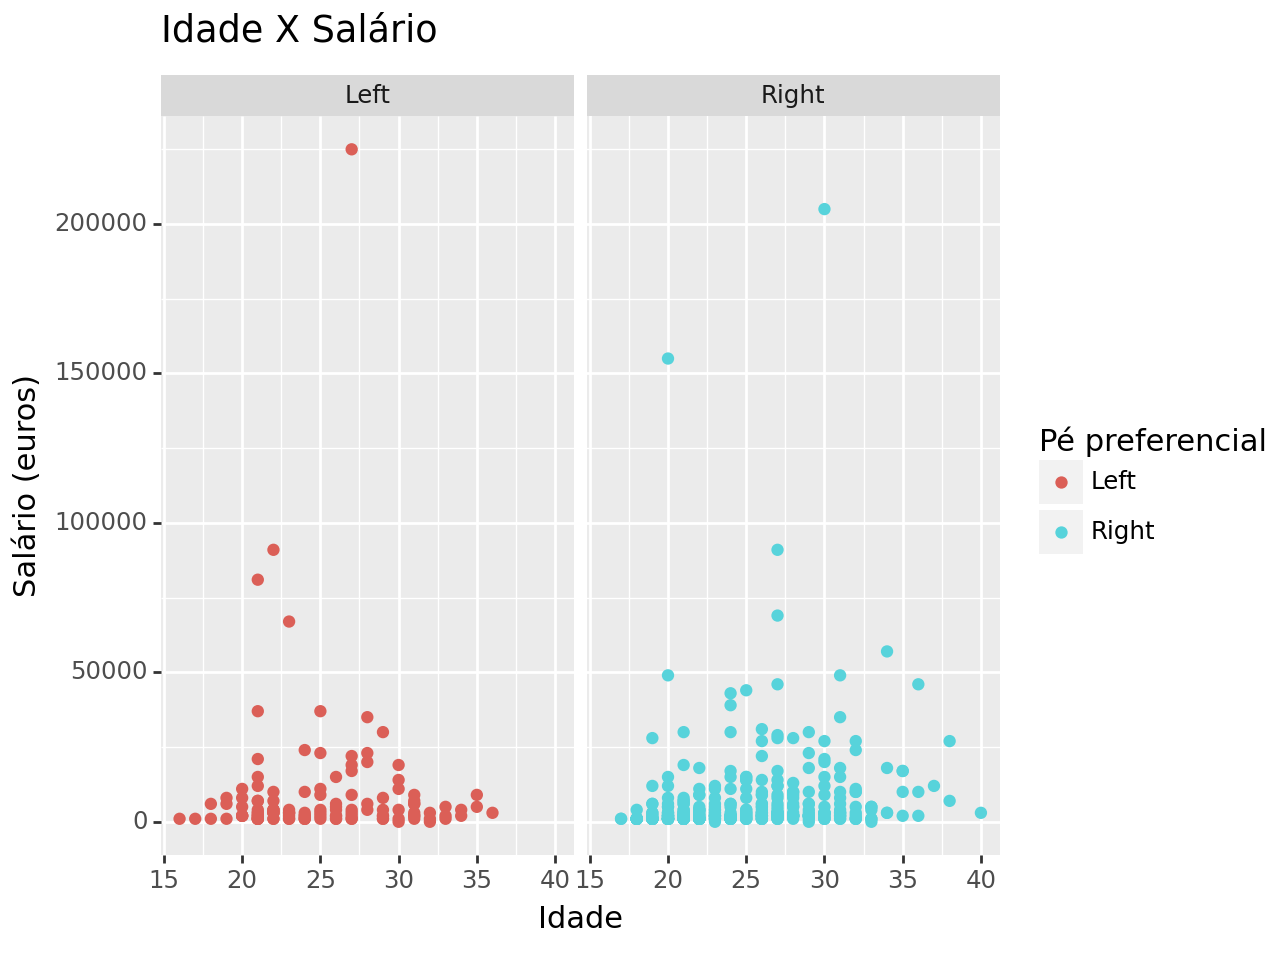

<Figure Size: (640 x 480)>

In [23]:
(ggplot(fifa)+  aes(x = "age", y = "wage_eur") + 
  geom_point(aes(color="preferred_foot")) +
  labs(
    x = "Idade", y = "Salário (euros)",
    title = "Idade X Salário", color = "Pé preferencial"
)+facet_grid("~preferred_foot"))

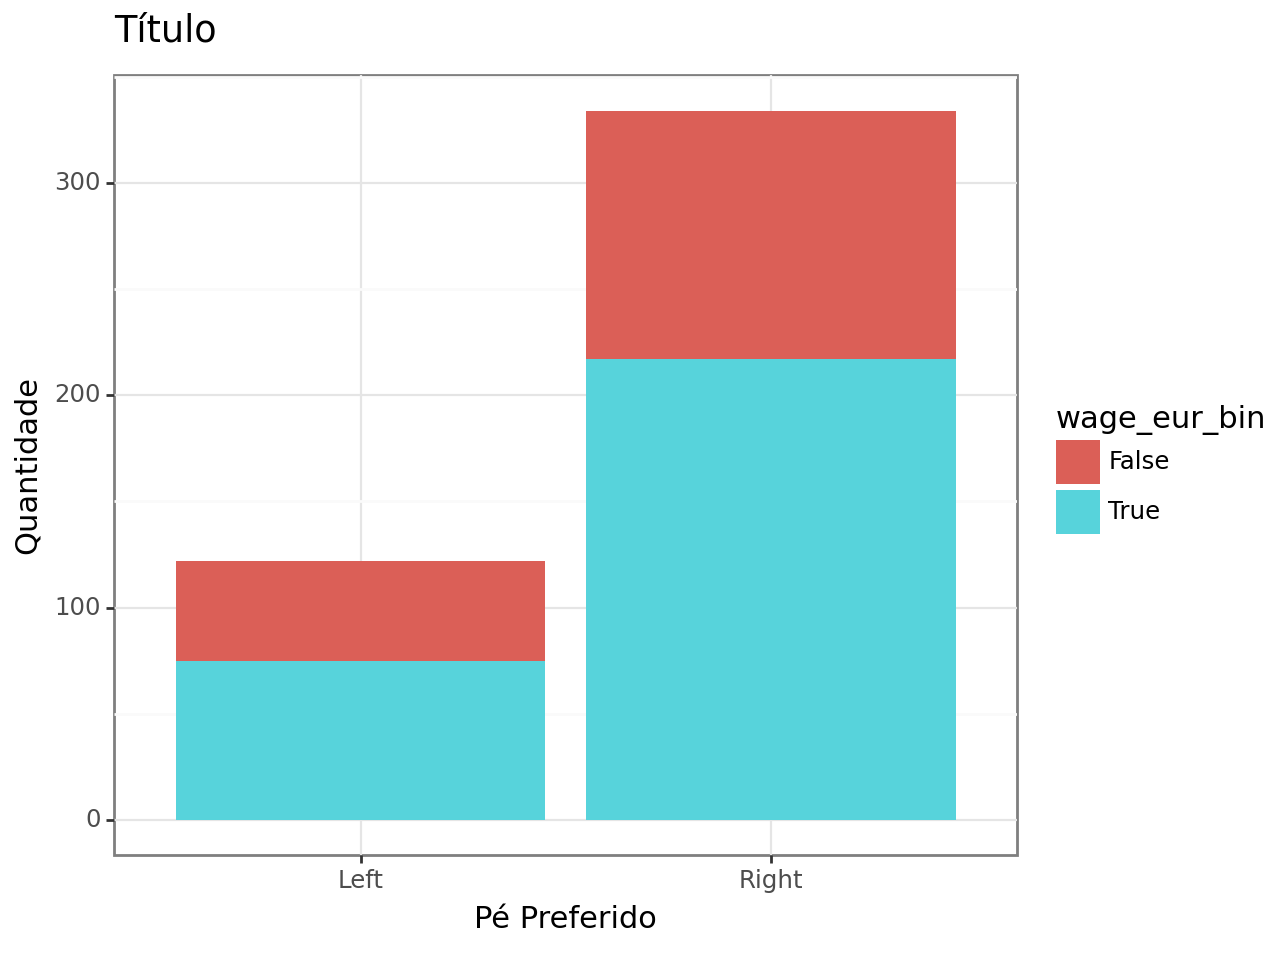

<Figure Size: (640 x 480)>

In [38]:
(ggplot(fifa)+aes("preferred_foot", fill="wage_eur_bin")+geom_bar(position="stack")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido", title="Título"))

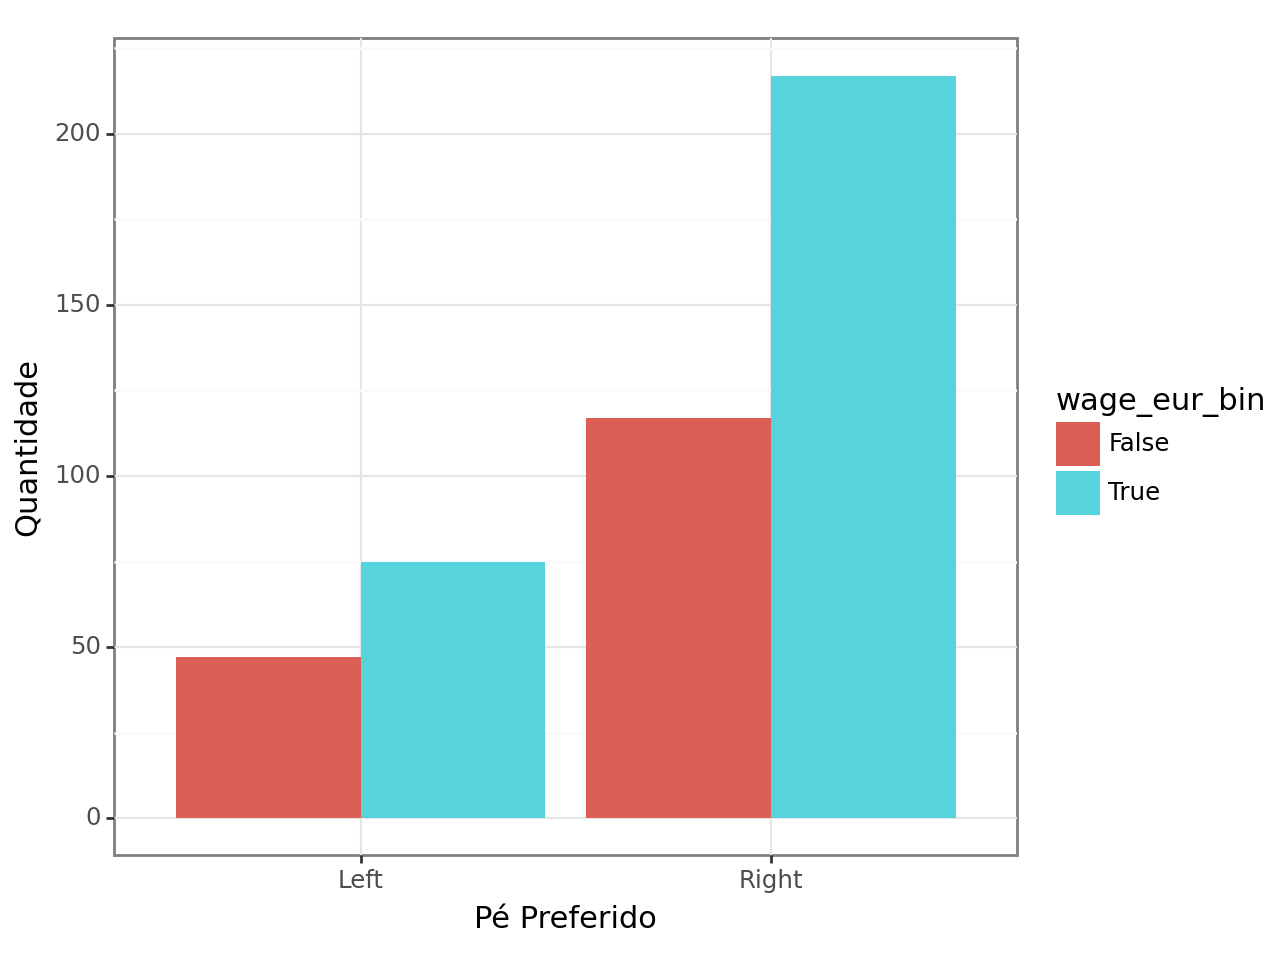

<Figure Size: (640 x 480)>

In [25]:
(ggplot(fifa)+aes("preferred_foot", fill="wage_eur_bin")+geom_bar(position="dodge")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido"))

C:\Users\alber\anaconda3\lib\site-packages\plotnine\scales\scale.py:143: PlotnineWarning: scale_fill_manual could not recognise parameter `type`


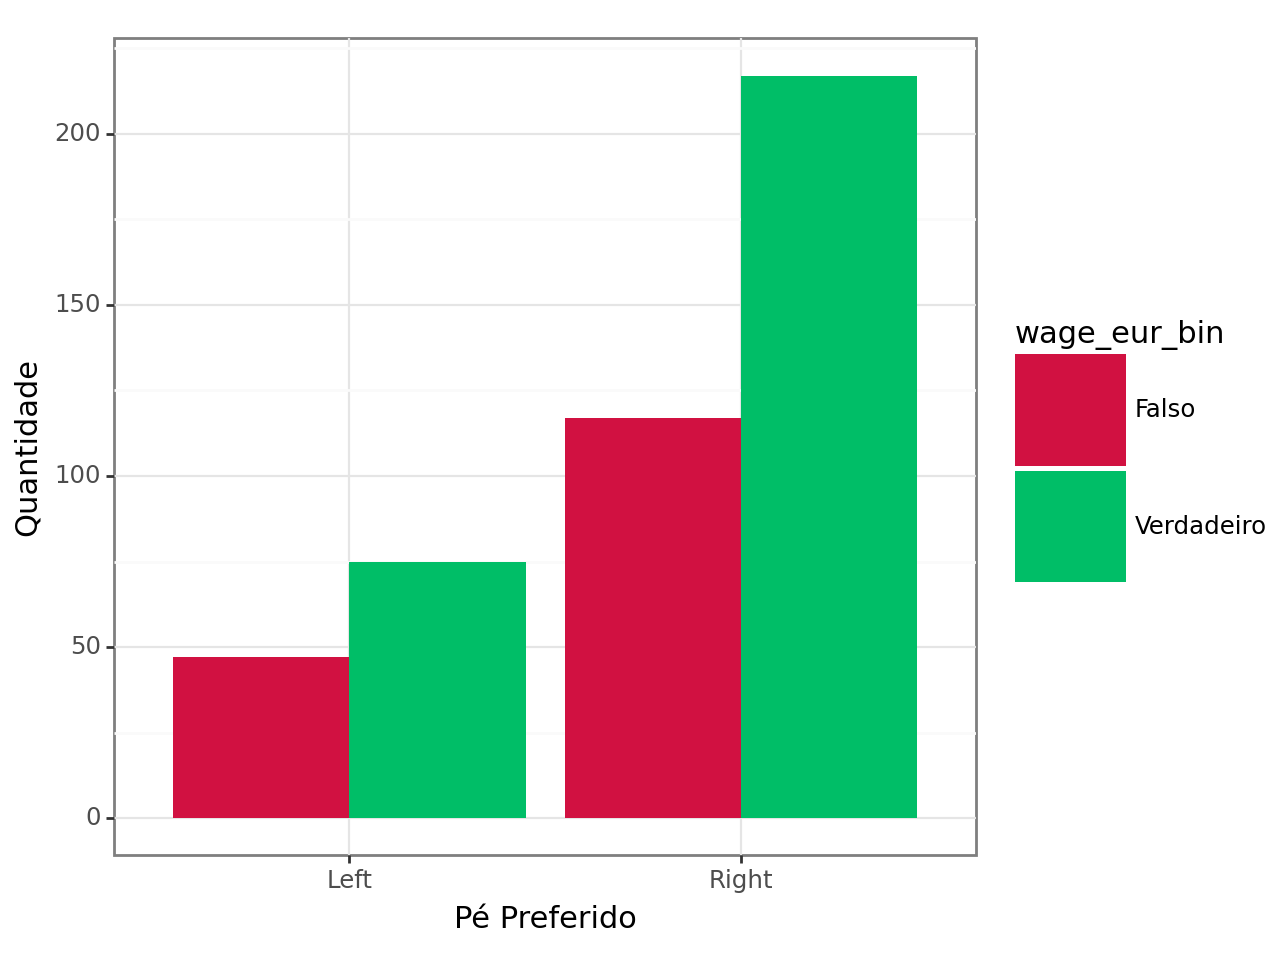

<Figure Size: (640 x 480)>

In [49]:
(ggplot(fifa)+aes("preferred_foot", fill="wage_eur_bin")+geom_bar(position="dodge")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido")
+scale_fill_manual(type="qual", values=["#d11141", "#00BE67"], labels=["Falso", "Verdadeiro"])
+theme(legend_key_size=40))

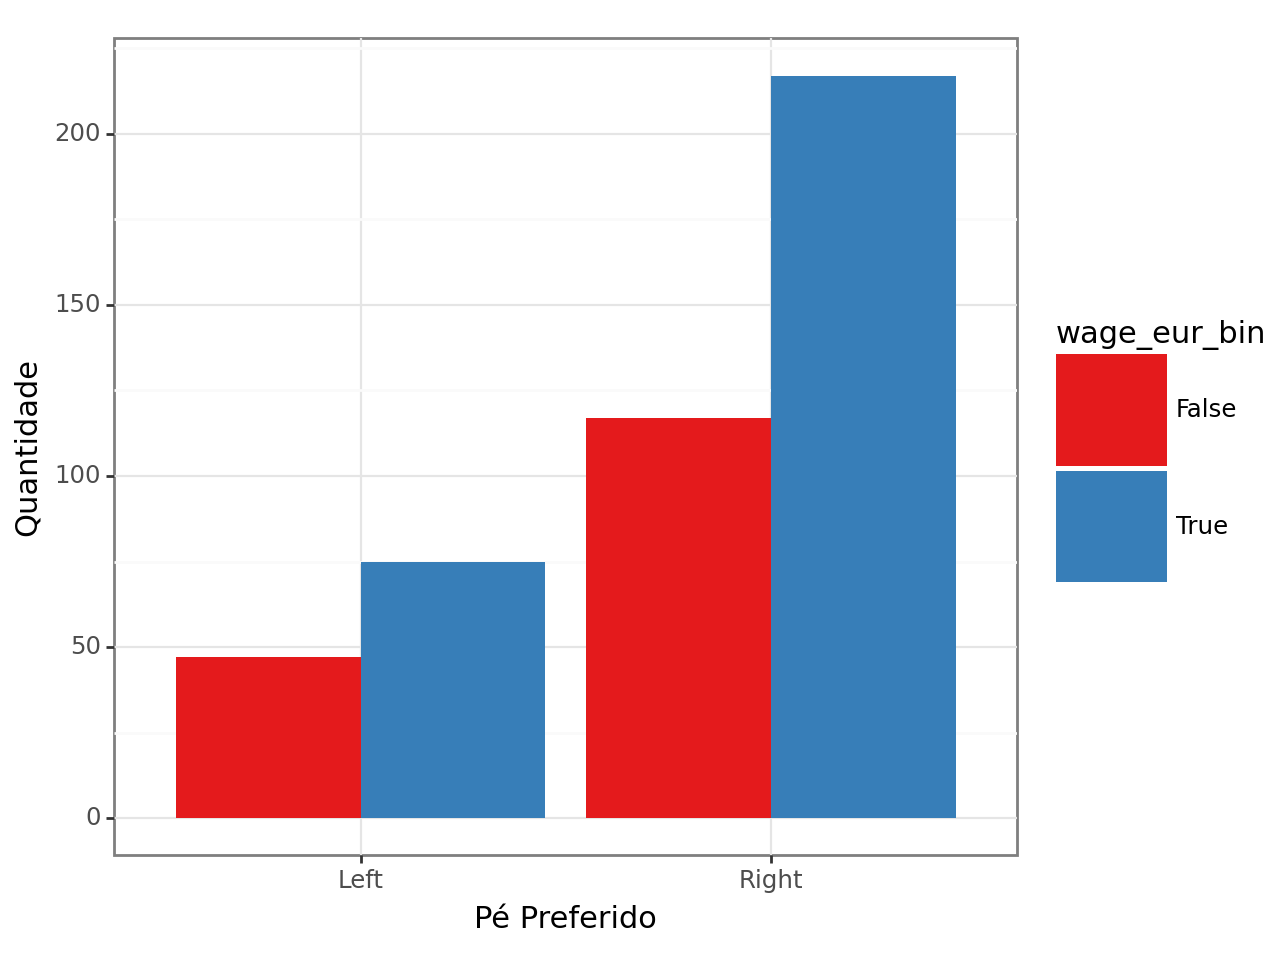

<Figure Size: (640 x 480)>

In [48]:
(ggplot(fifa)+aes("preferred_foot", fill="wage_eur_bin")+geom_bar(position="dodge")+theme_bw()+
labs(y = "Quantidade", x = "Pé Preferido")
+scale_fill_brewer(type="qual", palette="Set1")
+theme(legend_key_size=40))

In [27]:
dados = pd.DataFrame({
"ANO-MES": ["202201", "202202", "202203", "202204", "202205", "202206", "202207", "202208", "202209", "202210", 
            "202211", "202212"]*2,
"y": np.random.randint(4, high=35, size=24),
"cat": ["A"]*12+["B"]*12})

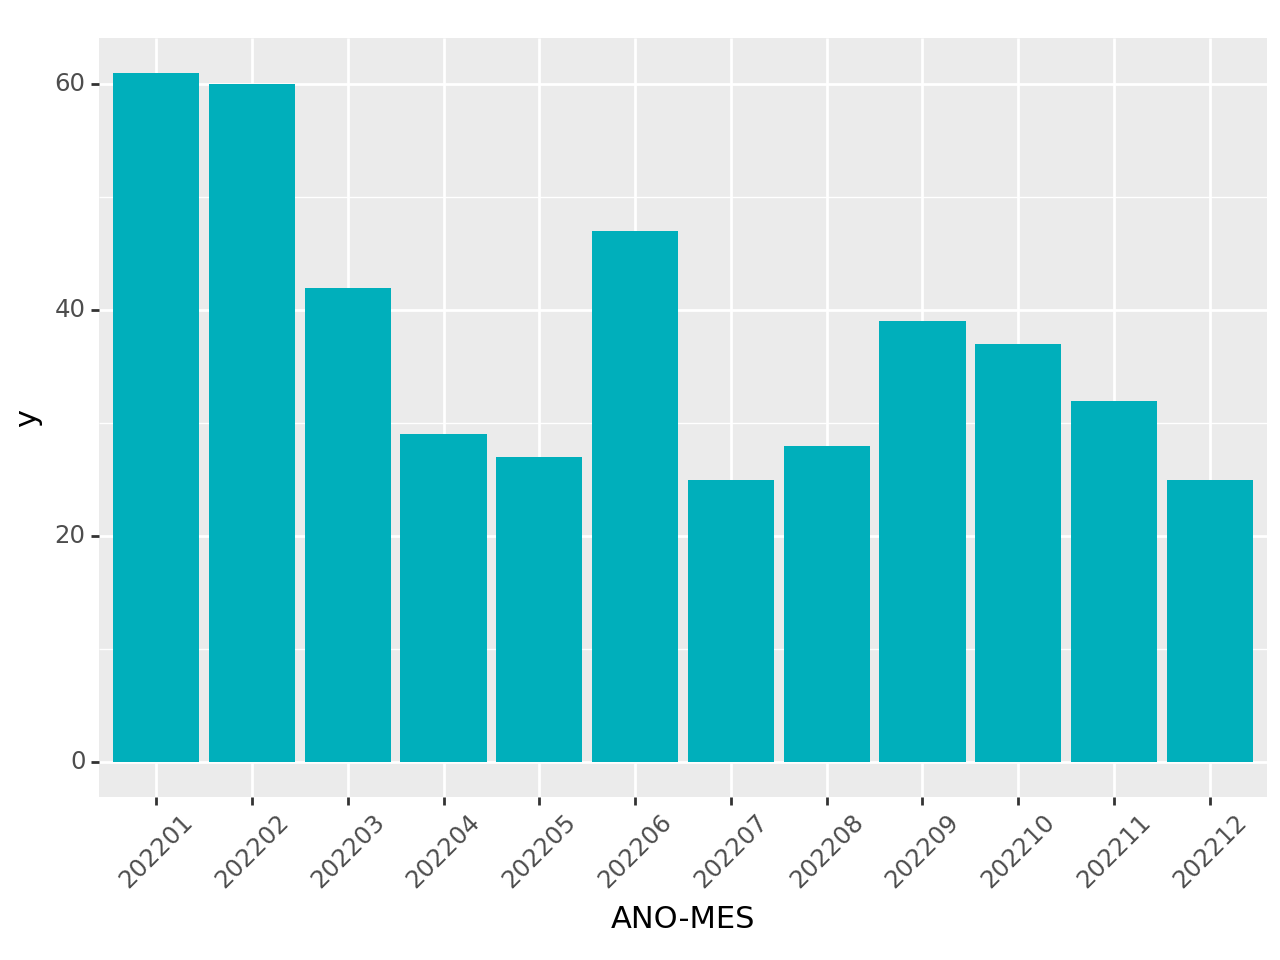

<Figure Size: (640 x 480)>

In [28]:
(ggplot(dados)+aes(x="ANO-MES", y="y")+geom_col(fill="#00AFBB")
+ theme(axis_text_x = element_text(angle = 45)))

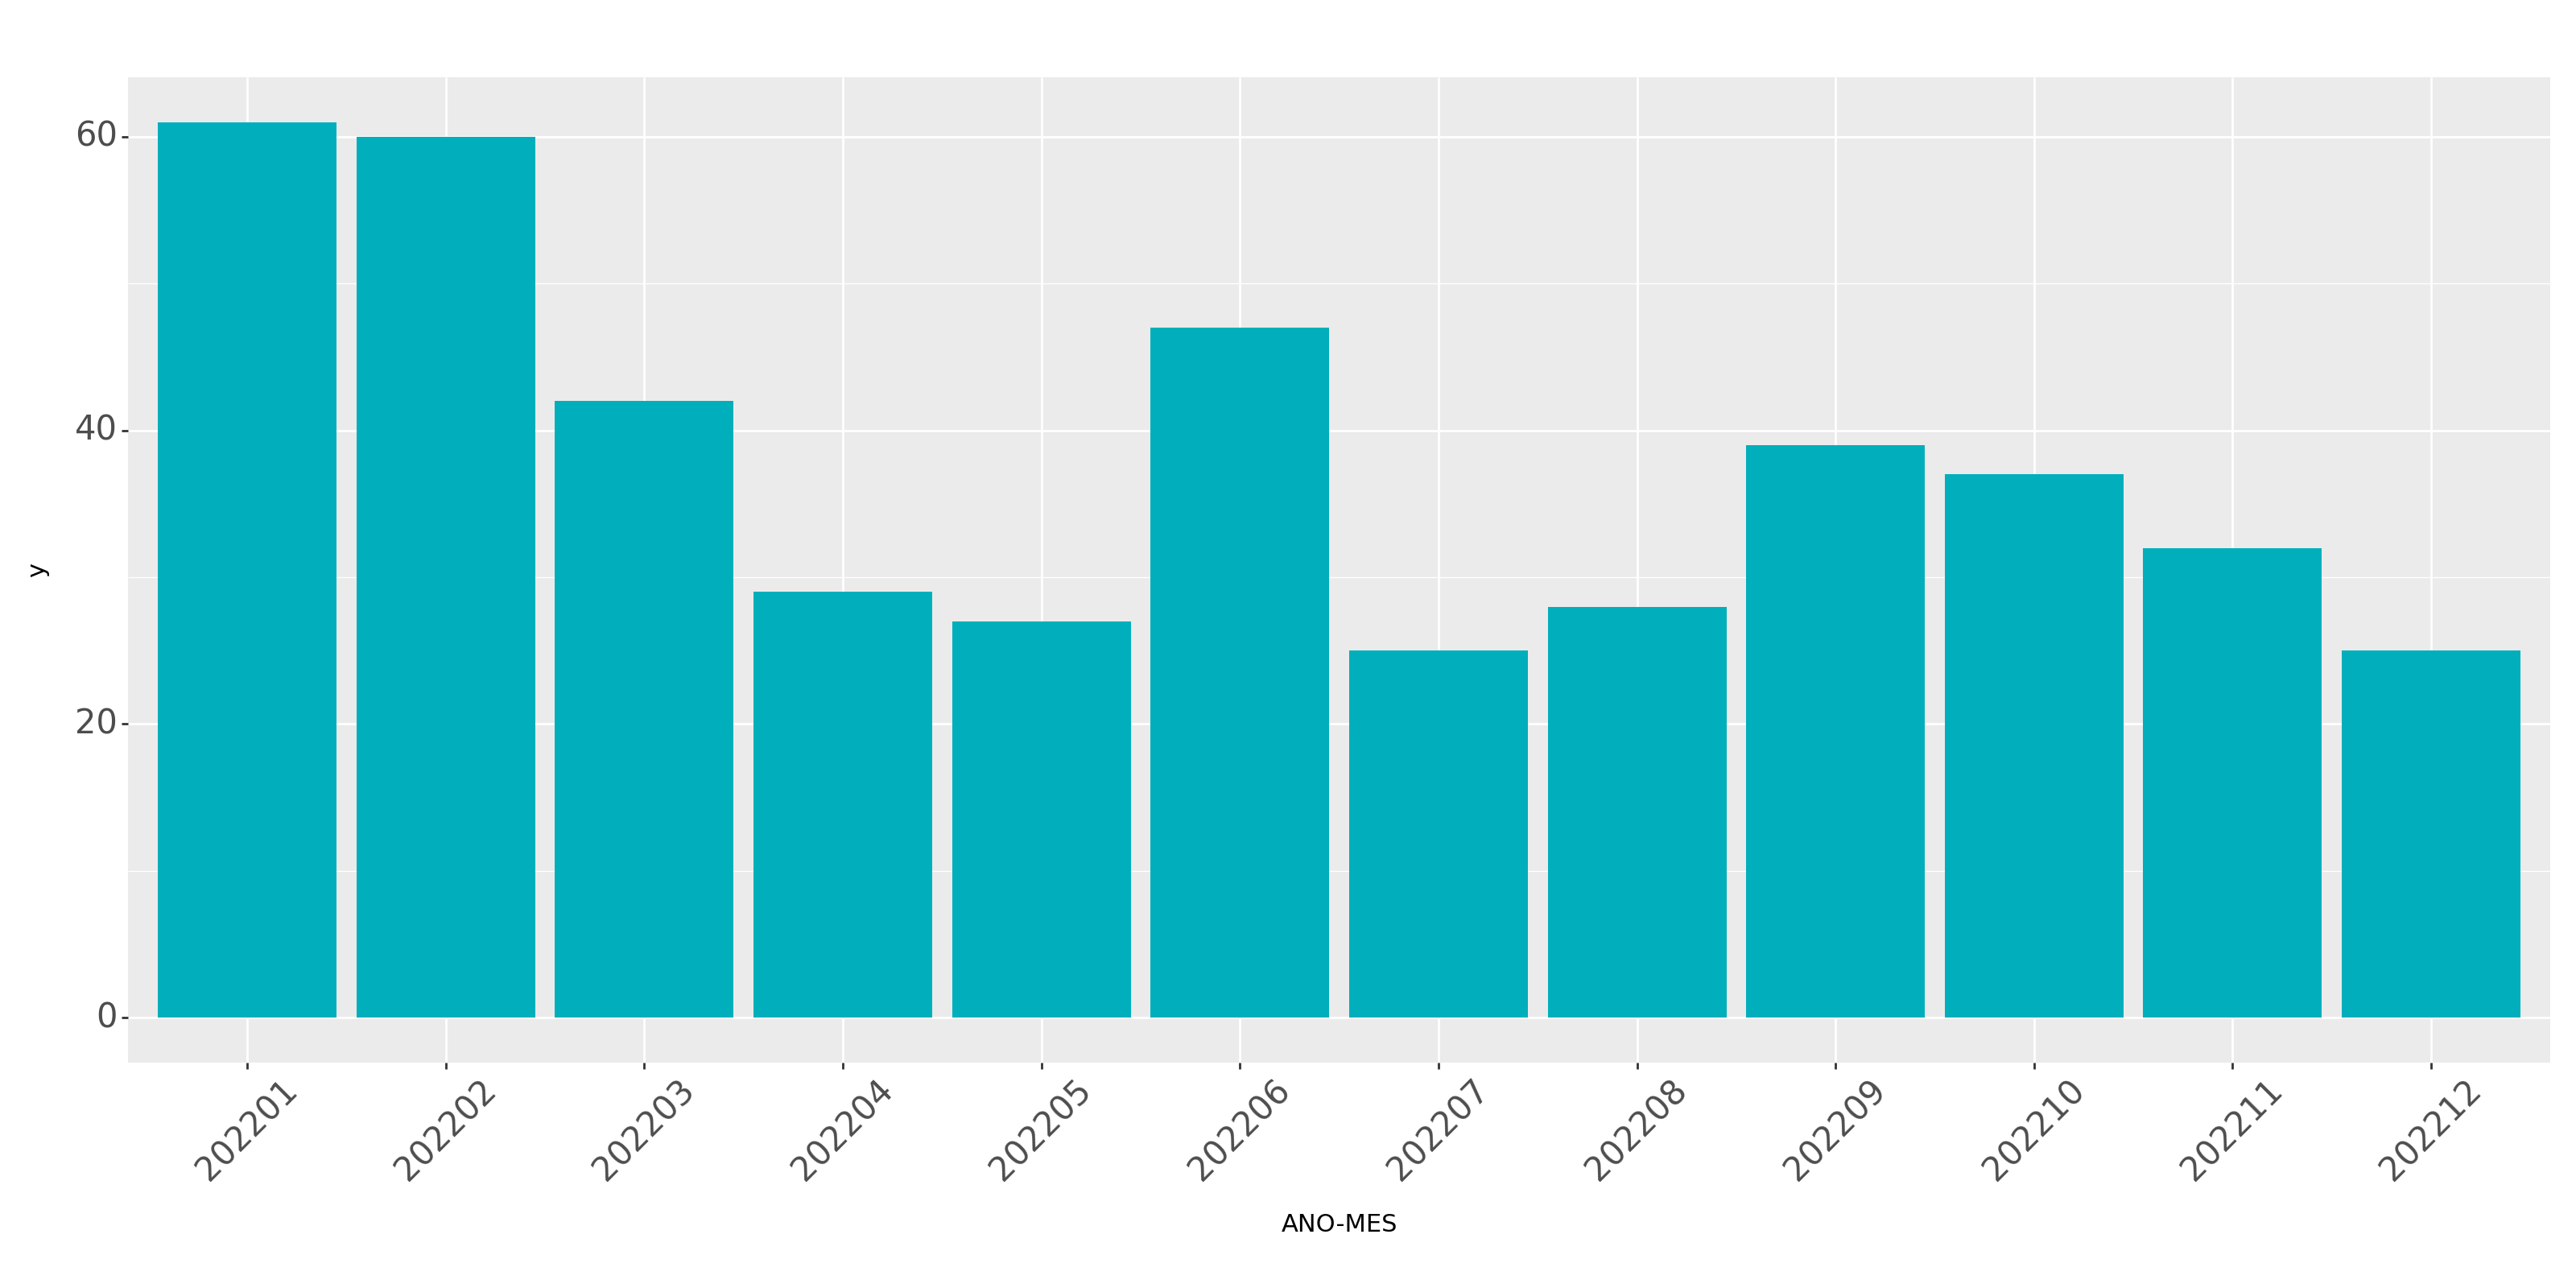

<Figure Size: (1600 x 800)>

In [44]:
(ggplot(dados)+aes(x="ANO-MES", y="y")+geom_col(fill="#00AFBB")
+ theme(axis_text_x = element_text(angle = 45, size=15),
        axis_text_y = element_text(size=15),
        figure_size=(16, 8)))

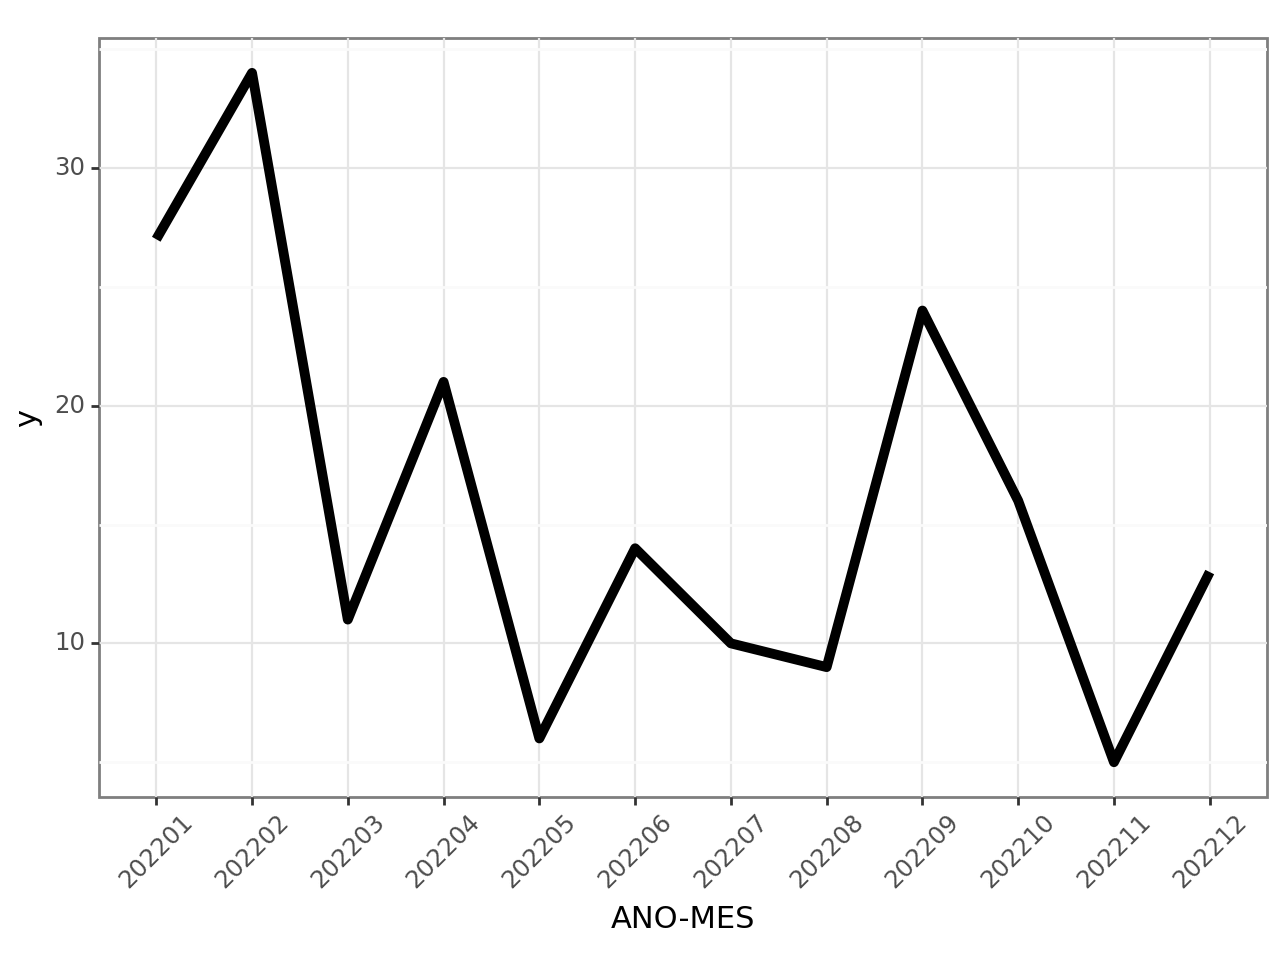

<Figure Size: (640 x 480)>

In [29]:
(ggplot(dados[dados["cat"]=="A"])+aes(x="ANO-MES", y="y", group = 2)+geom_line(size=2)
+theme_bw() + theme(axis_text_x = element_text(angle = 45)))

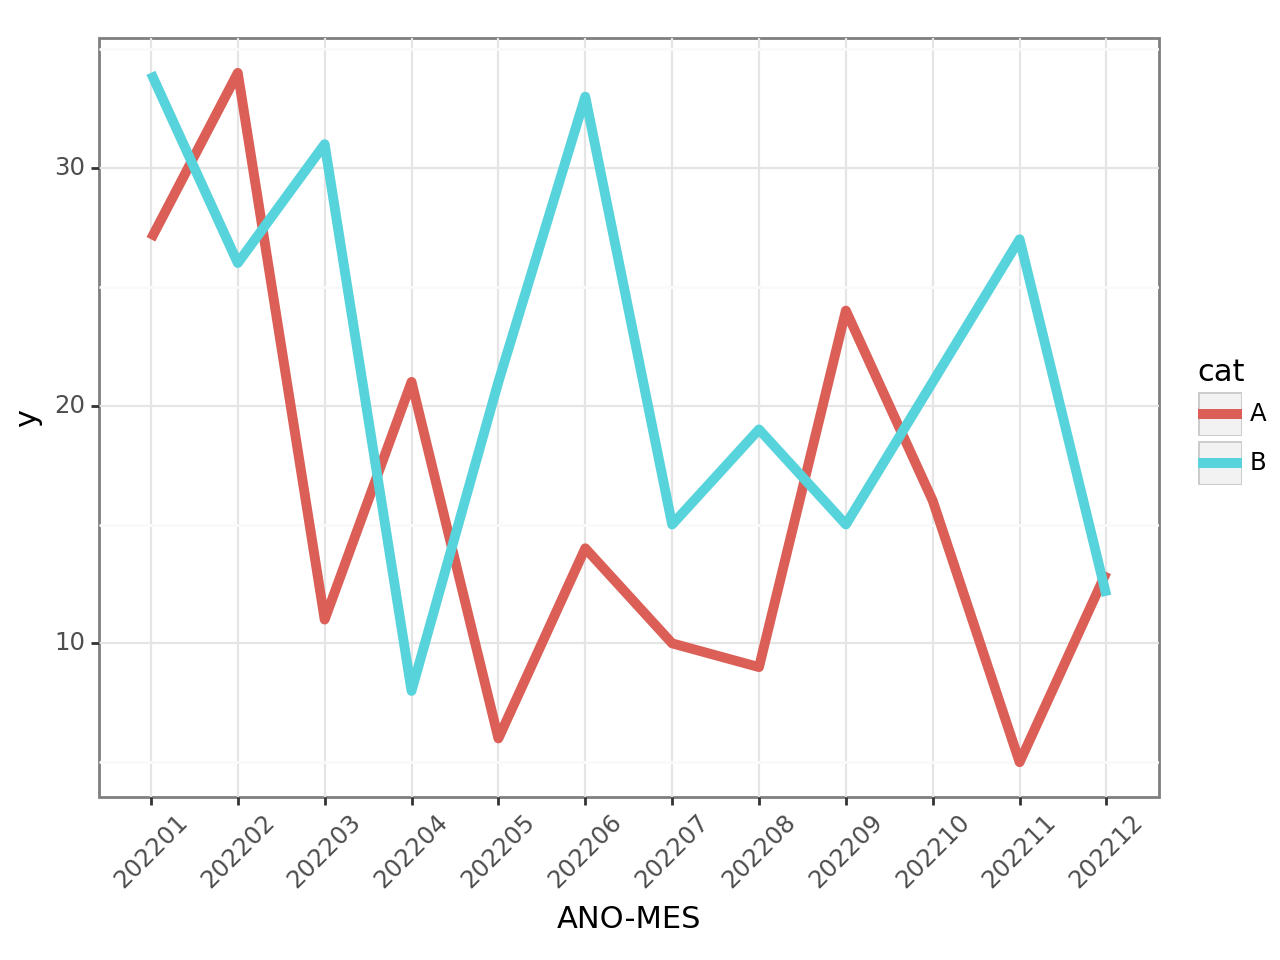

<Figure Size: (640 x 480)>

In [30]:
(ggplot(dados)+aes(x="ANO-MES", y="y", group = "cat", color="cat")+geom_line(size=2)
+theme_bw() + theme(axis_text_x = element_text(angle = 45)))

In [31]:
daily_show = pd.read_csv("../seaborn/dados/daily_show_guests_cleaned.csv")

In [32]:
daily_show.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [33]:
pd_crosstab = daily_show.groupby(["YEAR", "Group"]).size().reset_index()
pd_crosstab.rename(columns={0: "quant"}, inplace=True)

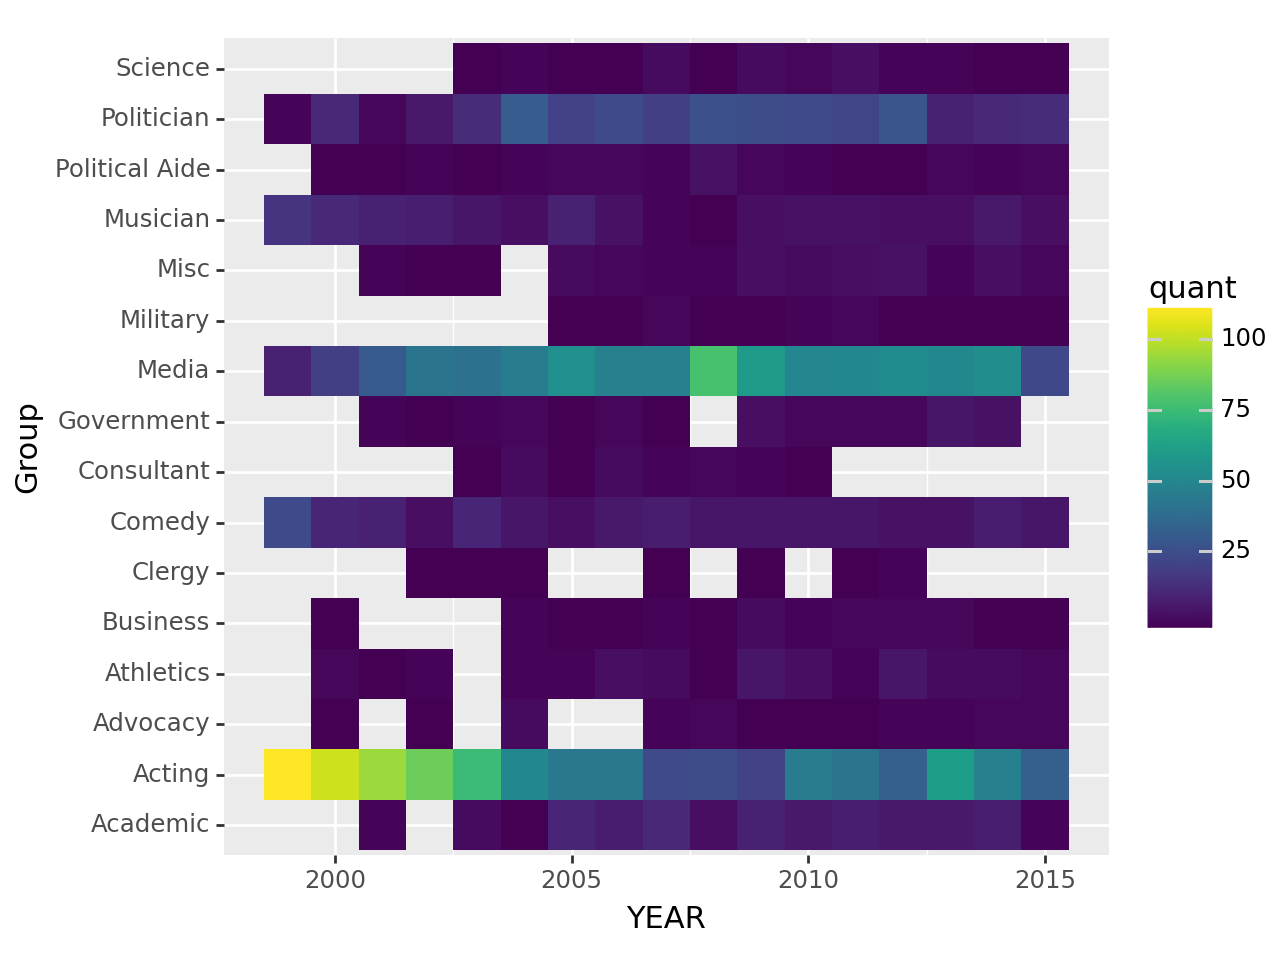

<Figure Size: (640 x 480)>

In [34]:
(ggplot(pd_crosstab, aes(y="Group", x="YEAR", fill="quant"))
 + geom_tile())

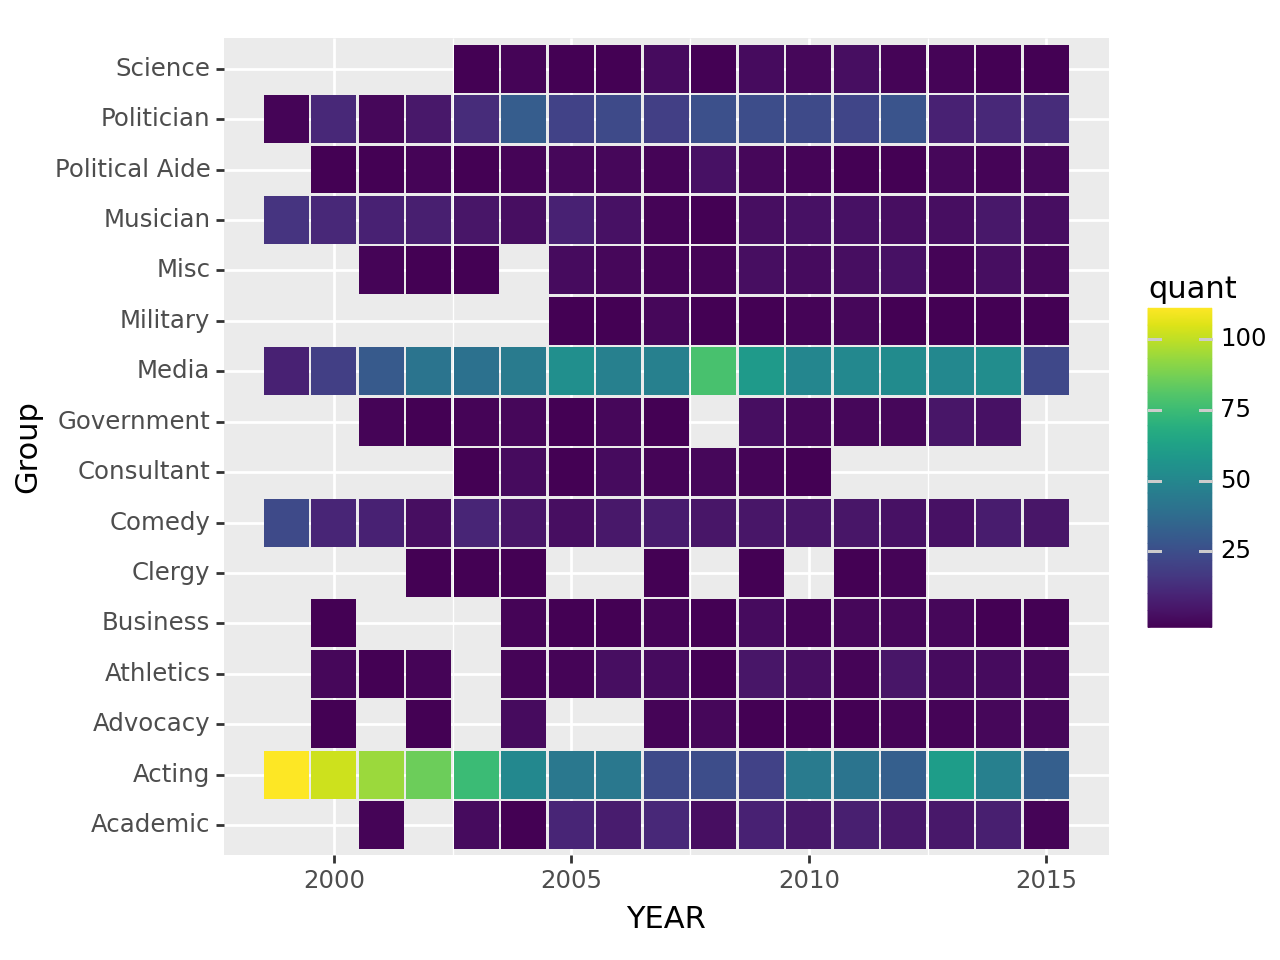

<Figure Size: (640 x 480)>

In [35]:
(ggplot(pd_crosstab, aes(y="Group", x="YEAR", fill="quant"))
 + geom_tile(aes(height=0.95, width=0.95)))

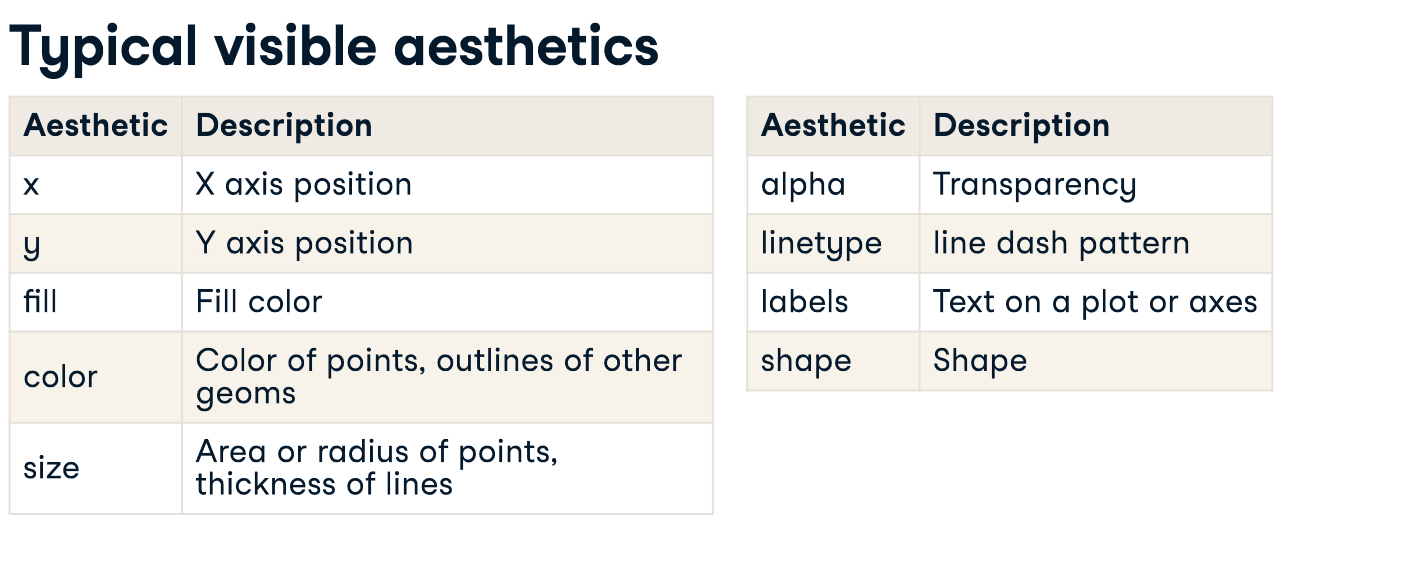

In [36]:
fifa.groupby("preferred_foot").agg({"age": "mean", "wage_eur": "mean"}).reset_index()

,preferred_foot,age,wage_eur
0,Left,25.245902,9844.262295
1,Right,25.056886,7868.263473


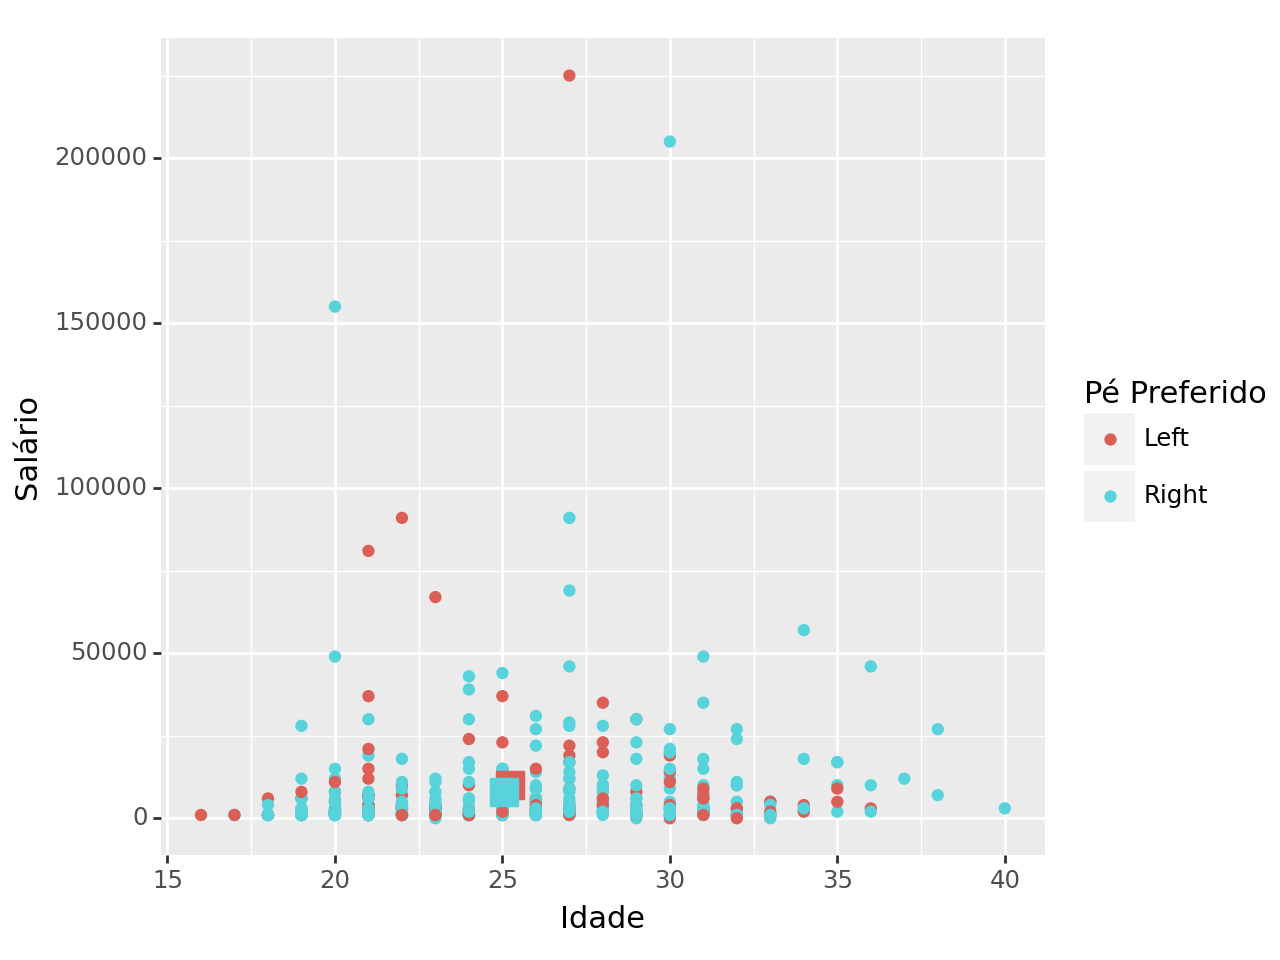

<Figure Size: (640 x 480)>

In [37]:
(ggplot(data = fifa)+  aes(x = "age", y = "wage_eur", color = "preferred_foot") + 
  geom_point()+ labs(x="Idade", y="Salário", color="Pé Preferido")+
  geom_point(data = fifa.groupby("preferred_foot").agg({"age": "mean", "wage_eur": "mean"}).reset_index(), shape=",", size=5))

## Descobrir
- Explorar os argumentos do theme: ticks, axis e legend
- geom_function
- geom_smooth
- geom_text
- Funções de distribuições contínuas como normal(já fiz isso em outro repo)
- qqplot(já fiz)
- Especificar limites do eixo x e y
- Usar breaks no eixo x e y

# Estudar melhor o capítulo 4 do curso 1 de ggplot e colocar aqui as funções mais importantes

## Falta colocar algumas funções do capítulo 4 do curso 1, cap 1 e 2 do curso 2